In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [54]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [55]:
data=10000
batch=100
set=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
c_reg1=0.02
c_reg2=0.0003
d=4

m^2= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=3.069466972979731>
lam= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2915398218838656>
alpha= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.0586011538569331>
beta= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.208552979697044>
<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([3.52230656, 2.54198259, 1.06802565, 3.18283296, 3.26459395,
       1.73215208, 0.46504696, 0.07790201, 2.17489192, 1.88216622])>


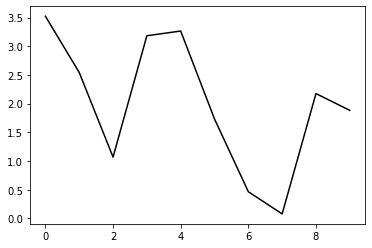

In [73]:
h=tf.zeros(layer)
h_in=[]
for i in range (layer):
    h_inn=np.float64(np.random.normal(2, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
m2=tf.Variable(np.float64(np.random.normal(2, 1)))
lam=tf.Variable(np.float64(np.random.normal(1, 1)))
alpha=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
beta=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
#m2=tf.constant(np.float64(5.6))
#lam=tf.constant(np.float64(0.61))
#alpha=tf.constant(np.float64(1.444635))
#beta=tf.constant(np.float64(0.00615))
print("m^2=", m2)
print("lam=", lam)
print("alpha=", alpha)
print("beta=", beta)
print(h)
plt.plot(h.numpy(), 'k-')
plt.show()

In [57]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [58]:
x=[i*0.2 for i in range (30)]
y=[0.0, 0.018, 0.035, 0.053, 0.0715, 0.0895, 0.107, 0.125, 0.146, 0.1665, 0.1875, 0.2085, 0.229, 0.25, 0.265, 0.281, 0.296, 0.3115, 0.3275, 0.343, 0.3565, 0.385, 0.4375, 0.5, 0.6, 0.675, 0.735, 0.815, 0.865, 0.885]
y[:]=[2*v for v in y]
fp1 = np.polyfit(x, y, 15)
print(fp1)

[ 1.59046394e-05 -6.81729682e-04  1.31412795e-02 -1.50525136e-01
  1.14052774e+00 -6.02241647e+00  2.27455168e+01 -6.20704699e+01
  1.22166922e+02 -1.71187074e+02  1.66428955e+02 -1.07461552e+02
  4.28229887e+01 -9.20544914e+00  9.55260239e-01 -1.30911492e-04]


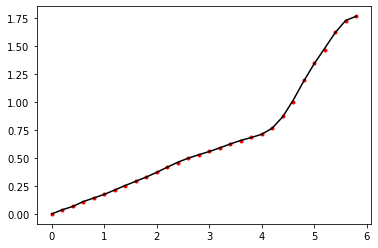

In [59]:
def f(x):
    y=0
    for i in range (16):
        y=y+fp1[i]*x**(15-i)
    return y
yy=[f(i*0.2) for i in range (30)]
plt.plot(x, y, 'r.')
plt.plot(x, yy, 'k-')
plt.show()

In [60]:
def NN_func_p(f):
    Positive=[]
    append=Positive.append
    while len(Positive)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))<=noise: append([H, M])
        else: continue
    return Positive
def NN_func_n(f):
    Negative=[]
    append=Negative.append
    while len(Negative)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))>noise: append([H, M])
        else: continue
    return Negative

In [61]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(f))
    Negative.insert(i, NN_func_n(f))

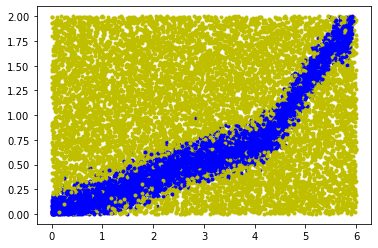

In [62]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive[i]])
    y_data1.insert(i, [v[1] for v in Positive[i]])
    x_data2.insert(i, [v[0] for v in Negative[i]])
    y_data2.insert(i, [v[1] for v in Negative[i]])
    plt.plot(x_data2[i], y_data2[i], 'y.')
    plt.plot(x_data1[i], y_data1[i], 'b.')
plt.show()

In [63]:
def Dfunc(hh, m):
    D=tf.math.sqrt(tf.math.abs(1+4*m/(hh[0]**2)))
    return D

In [64]:
def LP2(hh, m, la, alpha, beta, HH, MM):
    D=Dfunc(hh, m)
    phi=alpha*HH+beta*MM
    pi=(d/2)*(D-1)*alpha*HH+(d/2)*(-D-1)*beta*MM
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_01(hh, m, la, alpha, beta, list_hr):
    PP=[]
    NN=[]
    H=np.array(list_hr)[:, 0]
    M=np.array(list_hr)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, m, la, alpha, beta, H, M)[1]))
    for i in range (len(H[F<0.1])):
        PP.append([H[F<0.1][i], M[F<0.1][i]])
    for i in range (len(H[F>=0.1])):
        NN.append([H[F>=0.1][i], M[F>=0.1][i]])
    return PP, NN

In [65]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[1])

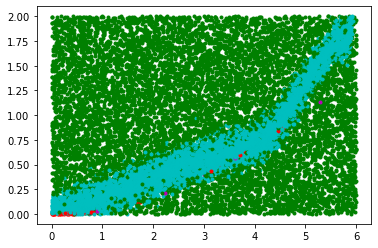

In [66]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [67]:
def Error_func(hh, m, la, alpha, beta, list1, list2):
    H0=np.array([v[0] for v in list1])
    M0=np.array([v[1] for v in list1])
    H1=np.array([v[0] for v in list2])
    M1=np.array([v[1] for v in list2])
    H_0, M_0=LP2(hh, m, la, alpha, beta, H0, M0)
    H_1, M_1=LP2(hh, m, la, alpha, beta, H1, M1)
    PPlist=t_func(M_0)
    NNlist=t_func(M_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return sum_n+sum_p+E_reg1+E_reg2

In [68]:
for i in range (set):
    print(Error_func(h, m2, lam, alpha, beta, Positive[i], Negative[i]))

tf.Tensor(1.1183689651748234, shape=(), dtype=float64)
tf.Tensor(1.1203311951589594, shape=(), dtype=float64)
tf.Tensor(1.118187227042518, shape=(), dtype=float64)
tf.Tensor(1.128330461292084, shape=(), dtype=float64)
tf.Tensor(1.1383678945848126, shape=(), dtype=float64)
tf.Tensor(1.1183920735331354, shape=(), dtype=float64)
tf.Tensor(1.1283678996737068, shape=(), dtype=float64)
tf.Tensor(1.138367875913489, shape=(), dtype=float64)
tf.Tensor(1.1207675621022433, shape=(), dtype=float64)
tf.Tensor(1.1283678996737727, shape=(), dtype=float64)
tf.Tensor(1.1283507677994231, shape=(), dtype=float64)
tf.Tensor(1.1283678996721582, shape=(), dtype=float64)
tf.Tensor(1.1280340077703717, shape=(), dtype=float64)
tf.Tensor(1.1183678997153261, shape=(), dtype=float64)
tf.Tensor(1.128449736708302, shape=(), dtype=float64)
tf.Tensor(1.1183678383829072, shape=(), dtype=float64)
tf.Tensor(1.1283678996701492, shape=(), dtype=float64)
tf.Tensor(1.1283678961338885, shape=(), dtype=float64)
tf.Tensor(1.11

# Optimize

0 1.1130257246601767
3.061104709471421 1.283359882353311 -0.05023923773667982 0.20018917402763475
[3.4723073  2.49200189 1.11802523 3.13283378 3.21459671 1.78214008
 0.51481624 0.02791809 2.1249007  1.93216016]


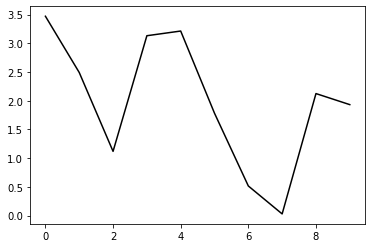

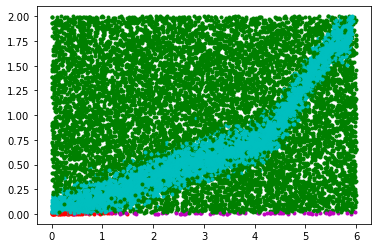

1000 0.9970178840264005
2.776669003167226 1.2817507362910099 -0.10263566702444282 0.03014511769865349
[2.23609132 2.38879891 2.31603639 2.05926828 1.69857161 1.25003706
 0.71219141 0.15294959 0.05932227 6.49598446]


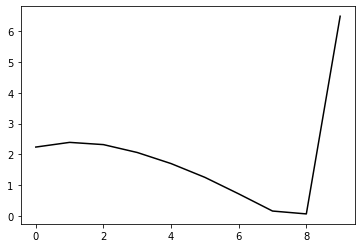

2000 0.7148864793270487
2.4320900724064702 1.0121792393191036 -0.04812421472561869 0.00811090413188743
[ 2.56467408  2.20030078  1.68939028  1.03348037  0.2809429  -0.531332
 -1.36893317 -2.1929463  -2.39456753  8.8079507 ]


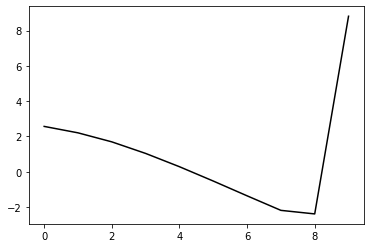

3000 0.35984472838924725
2.369020544403141 0.6708892724776442 0.08143872381675532 0.035691030113257846
[ 2.12430569  2.10810845  1.8832885   1.38396111  0.6131546  -0.36463147
 -1.46378887 -2.53483259 -2.89223538  8.76737657]


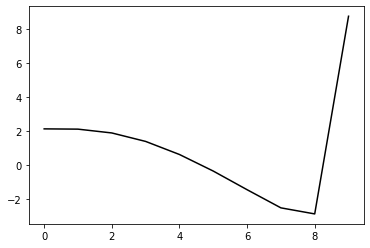

4000 0.7462663406327917
2.355200611099697 0.5280905775347841 0.07277470307209788 0.04826477862121931
[ 2.17024059  1.864887    1.67314615  1.32712892  0.75316897 -0.12710282
 -1.32708796 -2.65308914 -3.21891795  8.76271067]


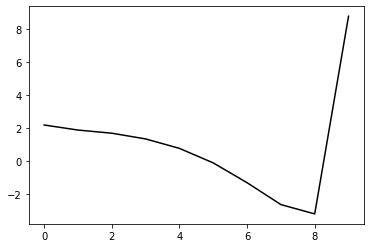

5000 0.4508497816395677
2.3347599554820126 0.34452976353934955 0.07670159314158638 0.046535570673577525
[ 2.02766920e+00  1.85625288e+00  1.67860834e+00  1.36297197e+00
  8.37511524e-01  3.62836038e-03 -1.23938661e+00 -2.79600772e+00
 -3.65032494e+00  8.65578578e+00]


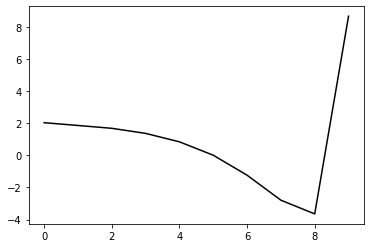

6000 0.39653566900500253
2.3134175941682855 0.18464700691609245 0.07539579437396104 0.046896423215037696
[ 1.96261183  1.77604903  1.59963674  1.30206949  0.80910338  0.01059474
 -1.23977782 -2.96468128 -4.09972492  8.62087466]


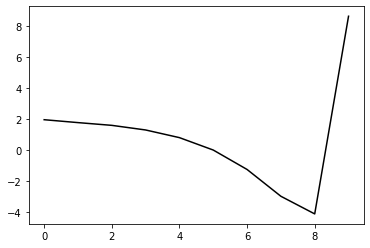

7000 0.42908583997958855
2.2971738390002585 0.025986074525211674 0.07714006390944157 0.04903643099339202
[ 1.81503578  1.81527094  1.65471559  1.37947799  0.92003068  0.16144185
 -1.07380784 -2.91310157 -4.31551303  8.61432487]


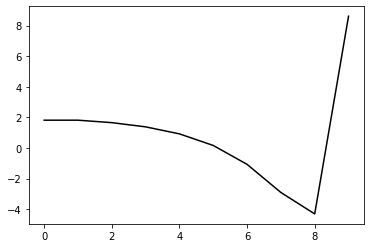

8000 0.37031511473557865
2.259504264502158 -0.14699963333555682 0.07561276013322875 0.046508221842826145
[ 1.84728402  1.63226547  1.43753868  1.14726709  0.68218737 -0.07482427
 -1.31811671 -3.25511083 -4.92505879  8.58900191]


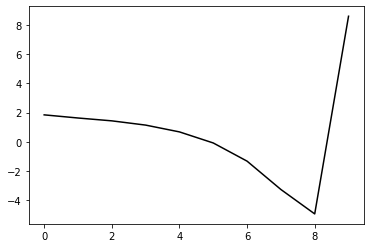

9000 0.4317436584080558
2.2553614226817893 -0.26952166773397734 0.0781322998552848 0.05569315093344834
[ 1.74561486  1.67936935  1.51717858  1.25820327  0.83388073  0.12914217
 -1.05815823 -2.98768804 -4.80823706  8.55423216]


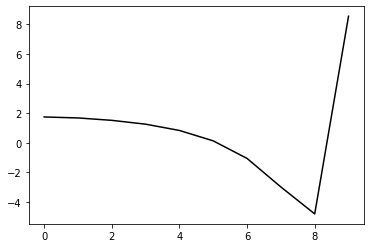

10000 0.43323791198208034
2.2333368147466115 -0.3934387774116925 0.08336055387446058 0.05861143306905861
[ 1.66956893  1.7184274   1.55877348  1.29450568  0.87421692  0.18516556
 -0.98165629 -2.93004634 -4.94948753  8.55249878]


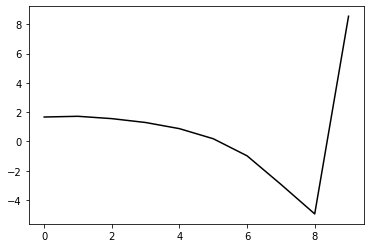

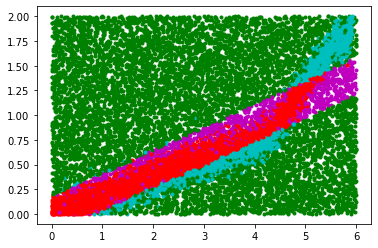

11000 0.3765009985530431
2.204209481715767 -0.5199457580417896 0.0851030717834976 0.0599047830301339
[ 1.6563905   1.67101615  1.50453358  1.2379096   0.81854559  0.1326704
 -1.03111778 -3.00713438 -5.26251276  8.50823409]


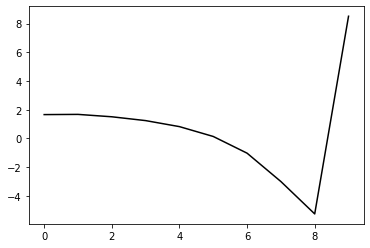

12000 0.38743506352629314
2.1777522869385253 -0.6886530385227971 0.08965162219370622 0.05819839038383409
[ 1.65940316  1.61704627  1.45796159  1.19697281  0.78425129  0.11005914
 -1.03959906 -3.02241657 -5.438744    8.50329472]


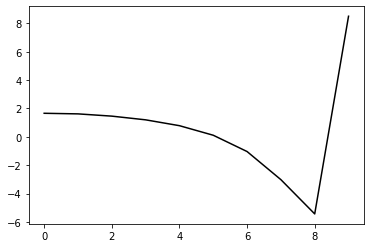

13000 0.40119534081199126
2.1333165040242057 -1.0119555849243271 0.10116970567488956 0.0683071895870611
[ 1.7098001   1.68287524  1.49621826  1.21338233  0.79265012  0.12356893
 -1.01801936 -3.01825728 -5.59011068  8.49490147]


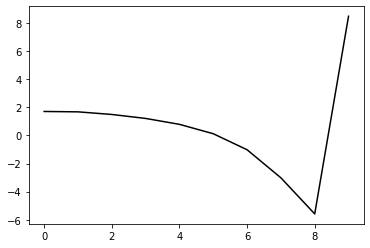

14000 0.353307601777801
1.9612459785782814 -1.482609239877651 0.15482023281126595 0.08853045962202692
[ 2.04128776  1.6656507   1.39809624  1.11138553  0.7247308   0.10164005
 -0.99748053 -2.98830998 -5.72291024  8.49866621]


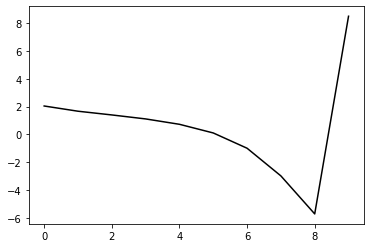

15000 0.21705467800226272
1.9436699789516723 -1.488793234767801 0.16330265648854822 0.08077223894878963
[ 2.07698766  1.86234461  1.59642879  1.26868125  0.83750317  0.20460164
 -0.85022053 -2.75404823 -5.48142841  8.46132336]


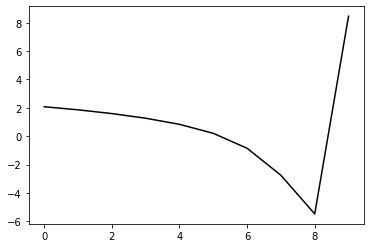

16000 0.3060988404054248
1.9172581783060645 -1.4827740278909554 0.1606701202153924 0.08272718905706755
[ 2.19046237  1.88494758  1.63617513  1.31623529  0.87506466  0.22736775
 -0.81785616 -2.66510121 -5.39042735  8.5135014 ]


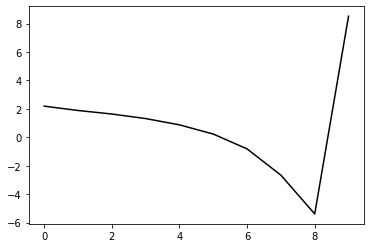

17000 0.20676634922285836
1.925257384080769 -1.460275751181459 0.155496652242289 0.0757350750052176
[ 2.20845066  1.95976067  1.72563157  1.4171385   0.9812581   0.33127646
 -0.71012247 -2.51637089 -5.21048665  8.53484664]


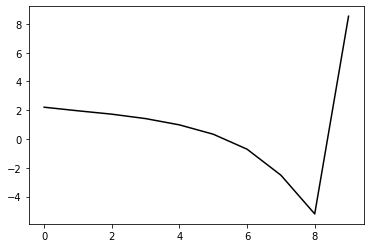

18000 0.2695952471715372
1.9022759799825613 -1.4542502966892958 0.15447160684923303 0.07471350122606255
[ 2.25845548  1.99655781  1.77347502  1.46587538  1.03266146  0.38452739
 -0.65900402 -2.46135644 -5.18915982  8.50764453]


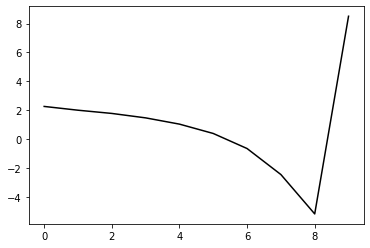

19000 0.23388906645584795
1.8638994423146196 -1.4561228408054057 0.15966714302850257 0.07135890611861394
[ 2.21976941  2.0982685   1.88786564  1.59246393  1.16699636  0.52091663
 -0.52437722 -2.33065599 -5.12514897  8.51811808]


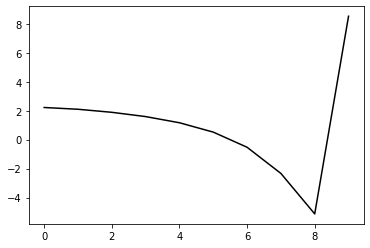

20000 0.23628810196125155
1.8547207264589793 -1.4401779065359366 0.15382047479965874 0.06637376634235156
[ 2.21519515  2.12453689  1.92557971  1.6352753   1.21145034  0.56492194
 -0.48264074 -2.28661155 -5.07066429  8.56880169]


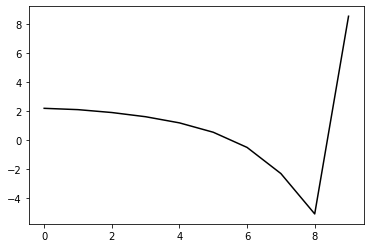

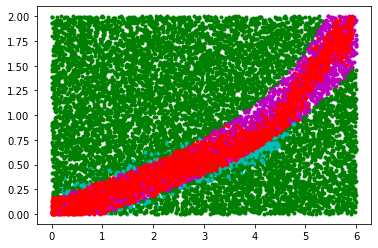

21000 0.22810076412335656
1.8088213146804653 -1.4444799267639707 0.15677788509054932 0.06446856869677166
[ 2.3094024   2.09046762  1.8950279   1.61499713  1.20602136  0.57405596
 -0.46541134 -2.27117179 -5.07234359  8.50657433]


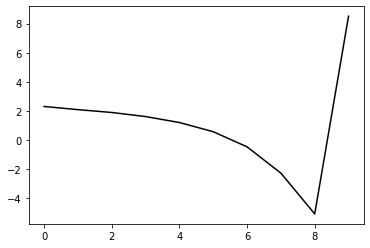

22000 0.2258012324694245
1.7858578891014276 -1.4336185095274823 0.1542473924286106 0.06353409694287424
[ 2.2907249   2.14154901  1.94829564  1.66725148  1.2530211   0.6146771
 -0.43395782 -2.26486638 -5.1283162   8.53734428]


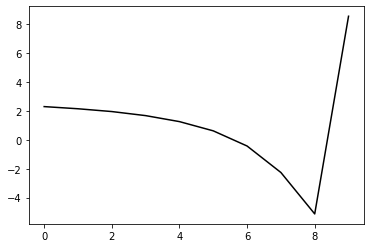

23000 0.2064894666755873
1.7347426467325688 -1.4335056828824446 0.15306075309390363 0.06495492783456037
[ 2.24314722  2.16275583  2.00073883  1.73722551  1.33156187  0.69379653
 -0.36429551 -2.2252684  -5.15121361  8.55142471]


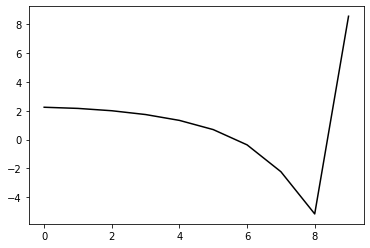

24000 0.24581645195544774
1.7104459176305342 -1.4298939767209042 0.15279889445003592 0.06283284091958068
[ 2.29543458  2.09100251  1.93246444  1.70122976  1.33256715  0.72538519
 -0.31359829 -2.16817347 -5.11236296  8.55503368]


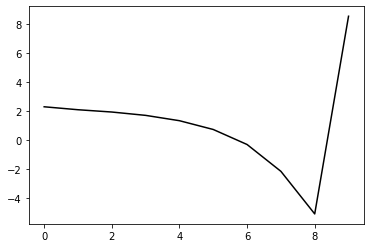

25000 0.19845637156049217
1.6933267031075994 -1.416102936002309 0.1489840780602885 0.061595412858902375
[ 2.27774602  2.16779528  1.99615527  1.75075784  1.38581372  0.79996626
 -0.21021523 -2.04448257 -4.99821946  8.54657897]


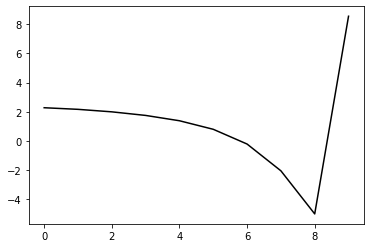

26000 0.2458315700489904
1.6548314851909105 -1.4109831743671428 0.14579540964894488 0.06621232013446947
[ 2.32109866  2.11971968  1.96867327  1.7424842   1.38917671  0.81497576
 -0.17718427 -1.99768732 -4.97791104  8.55024983]


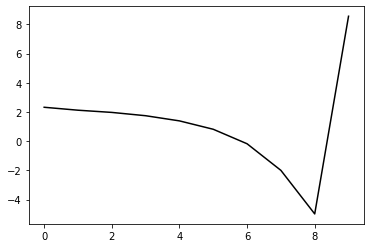

27000 0.18247780234336694
1.616203166808179 -1.408868360512766 0.14783718844468274 0.06255905893308061
[ 2.25992768  2.15631768  2.01221289  1.79768677  1.45380962  0.88519588
 -0.10445172 -1.9296344  -4.9530297   8.53343352]


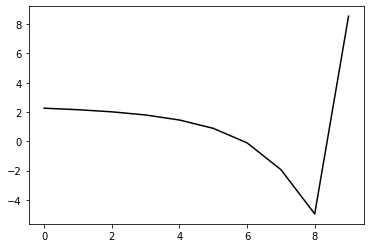

28000 0.2917263506103523
1.5950274571482654 -1.4006128623019731 0.14689090389029694 0.06015799281715328
[ 2.26235001  2.1527944   2.00815766  1.78512964  1.43940792  0.87772001
 -0.10272232 -1.92054405 -4.94220199  8.54740571]


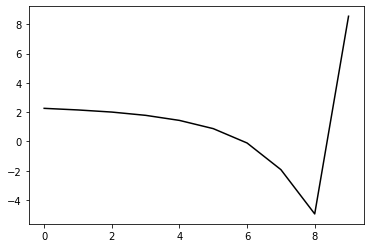

29000 0.27497819353685815
1.572189821623226 -1.3905079502454138 0.14477941334449462 0.06150949742324118
[ 2.29376949e+00  2.15318997e+00  2.00798483e+00  1.79592059e+00
  1.47036661e+00  9.36845996e-01 -4.15139886e-03 -1.77347215e+00
 -4.77117797e+00  8.57905200e+00]


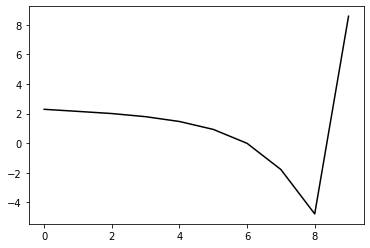

30000 0.25259685797019643
1.537702805906887 -1.3819956958669786 0.1434563428247505 0.060451428687518904
[ 2.29078926  2.1674524   2.03267862  1.82439345  1.499602    0.97347112
  0.05010084 -1.69601143 -4.67971842  8.54149147]


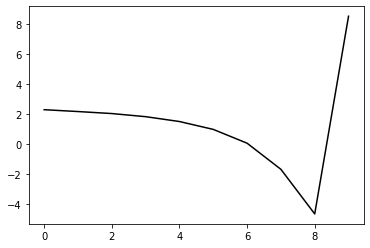

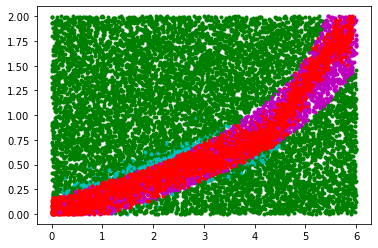

31000 0.24175492370643198
1.4926217140640472 -1.3803885675800862 0.1438863894057542 0.05930917685566752
[ 2.24937617  2.16820673  2.03650362  1.83175253  1.50751066  0.9738351
  0.03751698 -1.72119899 -4.72854378  8.56565372]


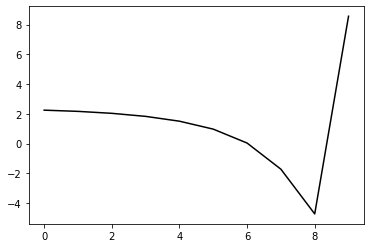

32000 0.22028242065939446
1.4761330082993562 -1.3717240953032916 0.14284423963023055 0.05963426012620732
[ 2.22271222  2.20057954  2.07139943  1.87944959  1.57283143  1.05767462
  0.14046623 -1.59341698 -4.56478448  8.62006934]


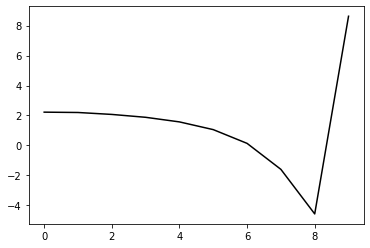

33000 0.18826482586886606
1.4373386782843567 -1.3674055836234709 0.14439163505740796 0.06044552476003281
[ 2.2727661   2.1241335   1.99905979  1.81064881  1.50352257  0.98897934
  0.0731863  -1.66598568 -4.65986048  8.60419957]


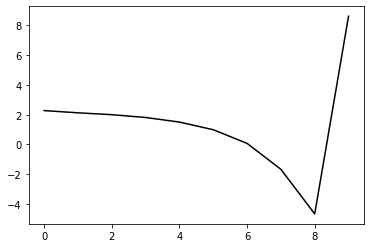

34000 0.2550200946684998
1.4059572420276925 -1.3589429368928367 0.14006757389877475 0.059460488475801
[ 2.25531371  2.13785096  2.00226508  1.80282331  1.49341823  0.98367301
  0.07642231 -1.65047007 -4.64009099  8.57002482]


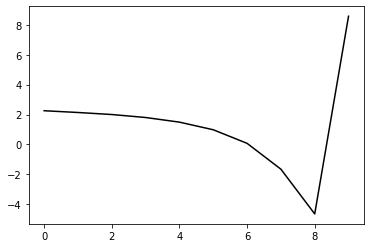

35000 0.25037801180239105
1.3645385495147218 -1.3599502240968382 0.14524872843242587 0.05392080543219055
[ 2.21349452  2.14590406  2.01030889  1.8174785   1.51255093  1.00158397
  0.08996026 -1.64633582 -4.66415869  8.58153036]


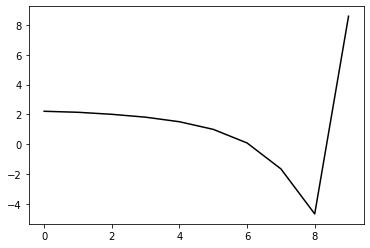

36000 0.2530544803662301
1.348357696241461 -1.3434025796045024 0.13963147026029477 0.05994240844262296
[ 2.21674018  2.16044524  2.04195894  1.85601351  1.56109552  1.0674163
  0.17773137 -1.5381488  -4.54275108  8.56590881]


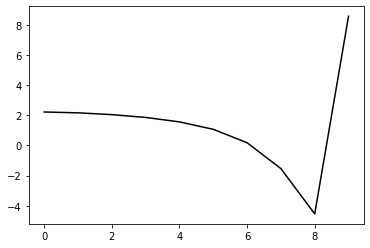

37000 0.19221925405564877
1.3361938538638432 -1.3317219135699334 0.1371639657761224 0.05871709047440889
[ 2.21993818  2.14344196  2.03781797  1.86612836  1.58400727  1.10677249
  0.24401801 -1.4252209  -4.35838213  8.60996028]


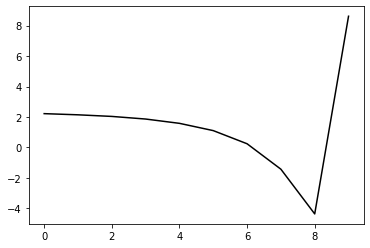

38000 0.2653732170656825
1.2877852300553128 -1.333120946129532 0.14078663878054126 0.05642119035020255
[ 2.22599015  2.10365842  1.97802739  1.79706784  1.5171649   1.0438201
  0.18293775 -1.48833819 -4.44221902  8.61033133]


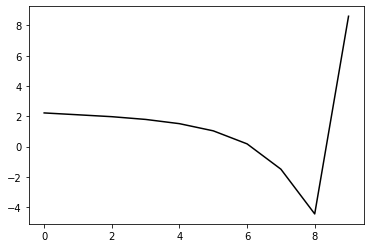

39000 0.16091085916953002
1.2708735370195157 -1.3227323619104623 0.13726529966485335 0.054130085258189506
[ 2.2142294   2.11987197  1.99440463  1.80506639  1.51500424  1.04243278
  0.19848991 -1.43561241 -4.32364769  8.623939  ]


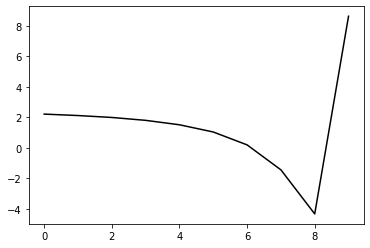

40000 0.19153760950625445
1.2529651154366193 -1.3062687487539304 0.13257284957480575 0.05846685812878863
[ 2.16083372  2.13938067  2.05505466  1.89145267  1.61695162  1.14949253
  0.30716834 -1.32303803 -4.19863635  8.60890413]


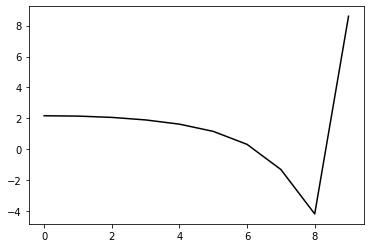

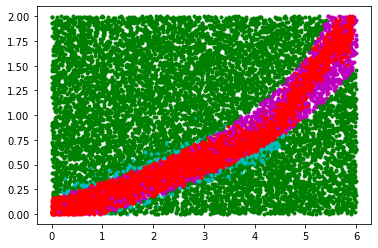

41000 0.24258769157793836
1.2113080624027948 -1.3082378833988237 0.13740288321742328 0.05352517454369605
[ 2.16621555  2.06673212  1.95225326  1.7852159   1.52115926  1.0700749
  0.24126441 -1.37371721 -4.22727483  8.63180008]


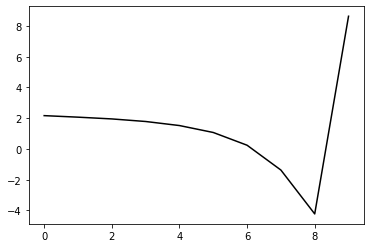

42000 0.1931623657443678
1.1925006117205679 -1.2888731981578967 0.13114911565866283 0.054945830584947786
[ 2.17028926  2.13549579  2.02452714  1.85768817  1.60316546  1.18123967
  0.4062741  -1.13930628 -3.91574402  8.66983885]


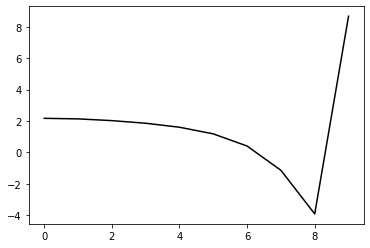

43000 0.16981554567305218
1.1598149668292699 -1.2820745692475666 0.13055948032086495 0.05928991807107584
[ 2.17492799  2.13405598  2.04166436  1.86803099  1.59655812  1.16041125
  0.38136396 -1.14319307 -3.83769578  8.66404261]


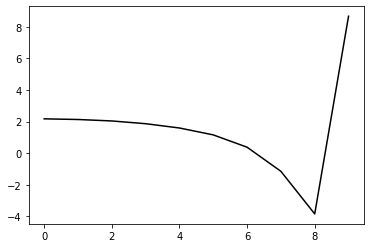

44000 0.22944593042534966
1.1308545989247651 -1.2752365302208497 0.1314756599680422 0.05696851836127035
[ 2.16965846  2.06917697  1.97953962  1.83321835  1.58208913  1.14396563
  0.345444   -1.19341336 -3.85696754  8.63399582]


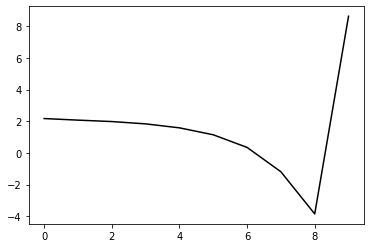

45000 0.22406097367490285
1.110847807241647 -1.2646327480276887 0.13009963698930094 0.058342173064570305
[ 2.13169483  2.09284689  1.98105724  1.81831271  1.55910077  1.11736392
  0.31855756 -1.21340016 -3.84204152  8.63373588]


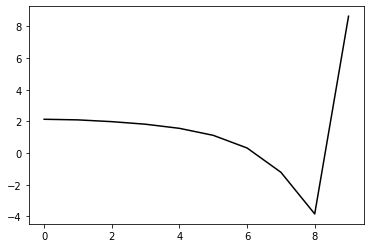

46000 0.19457657097349454
1.109242123386548 -1.250475817231235 0.1294141214339805 0.05870015109911664
[ 2.08483358  2.06638491  2.0019346   1.84505249  1.57169499  1.11495789
  0.30559832 -1.22362689 -3.80521081  8.64365144]


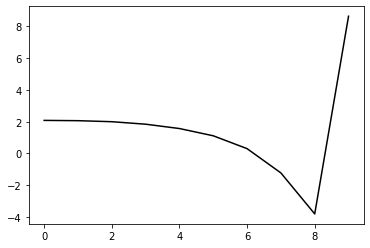

47000 0.2429915520678603
1.076503614830465 -1.2483885315988552 0.13227345687317563 0.056873798344066695
[ 2.07361815  2.03770257  1.9442985   1.79087409  1.53032405  1.08305066
  0.27382419 -1.25656949 -3.79940298  8.63143041]


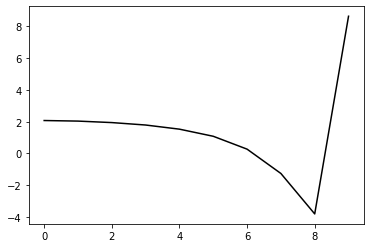

48000 0.2092201040468213
1.058509607586853 -1.237310056381075 0.12838512296560584 0.05756258424732667
[ 2.067727    2.02997989  1.93550816  1.78310695  1.53685349  1.11635756
  0.34761535 -1.13275934 -3.60003268  8.65137673]


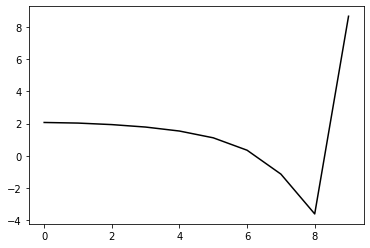

49000 0.21360980016208006
1.0398407298850705 -1.2299646271845897 0.13137061207098807 0.06092173722053772
[ 2.04517876  2.07968657  1.96776657  1.77777782  1.49637314  1.05123425
  0.2789142  -1.17312881 -3.56730659  8.67630588]


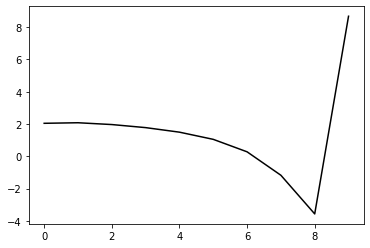

50000 0.22888496266633843
0.9937283429100089 -1.22630835156587 0.13448247090362042 0.05573969169128343
[ 2.09205514  1.99717645  1.84282461  1.63985815  1.35576014  0.91818906
  0.16143779 -1.25704078 -3.59553896  8.70935889]


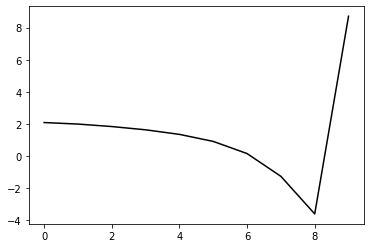

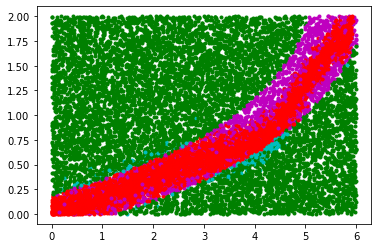

51000 0.15306181161958013
0.9736611645587371 -1.2083358994407516 0.12916587394379508 0.06056798704002834
[ 2.09021029  1.9486522   1.82099057  1.63993771  1.34986201  0.88192848
  0.09686831 -1.32046156 -3.59983615  8.68794164]


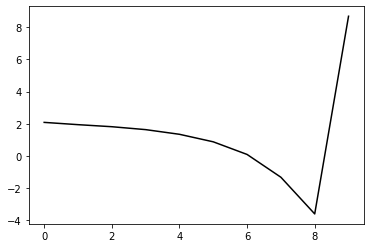

52000 0.22359927285510398
0.9664452067768722 -1.19816114072984 0.13165961964945935 0.0548986390663512
[ 2.05208178  1.97201657  1.86067898  1.69125184  1.43073723  1.00291363
  0.25001033 -1.14360975 -3.38073592  8.68995348]


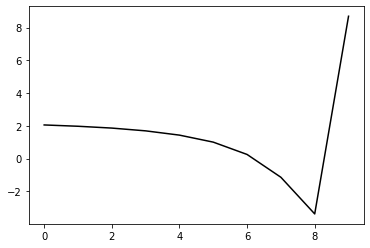

53000 0.1834126902142867
0.9298072568332344 -1.1866917239040409 0.12704588304451353 0.05719935515694143
[ 2.07997805  1.97525665  1.84661491  1.66607767  1.39836727  0.97727872
  0.25307075 -1.0895712  -3.22992863  8.72313355]


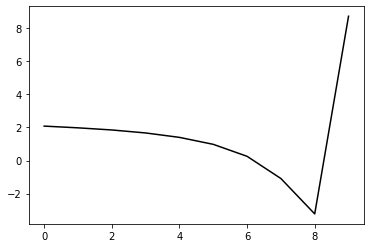

54000 0.19146007669223356
0.9163958318137985 -1.1756037302769016 0.12748232261056144 0.06022851300268494
[ 2.03470348  2.02533351  1.93020647  1.75652883  1.48469883  1.05164956
  0.31276127 -1.03787675 -3.16464792  8.72590122]


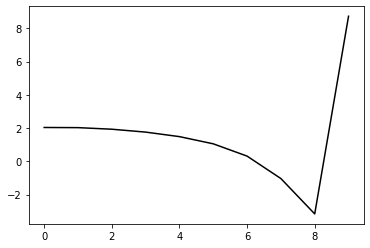

55000 0.19817218758039268
0.8913286524298308 -1.1699032412764256 0.1271716493355093 0.05804311967963029
[ 2.02734541  1.9424689   1.81602273  1.64313913  1.38244473  0.95679301
  0.22070495 -1.10918585 -3.15777994  8.72305811]


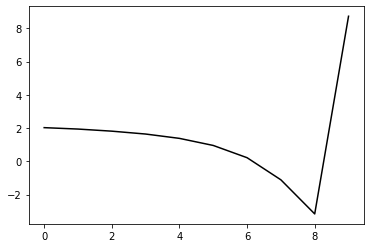

56000 0.2439336733088811
0.8839016846139489 -1.1612168779217062 0.12818374882415848 0.056312937830476695
[ 1.99771047  1.98382909  1.87756265  1.71709871  1.47420168  1.07319653
  0.36299033 -0.94788554 -2.96079043  8.77748632]


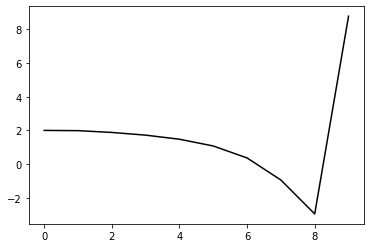

57000 0.1924899787913537
0.856555899683905 -1.1539253351175396 0.1269743240302448 0.057078202817553284
[ 2.0268253   1.96679953  1.8479795   1.68501146  1.43997465  1.04402392
  0.35280678 -0.92950893 -2.89116987  8.75473474]


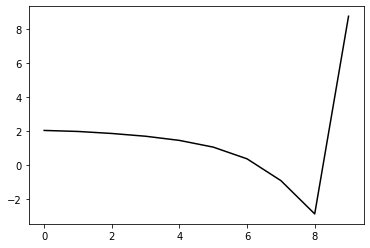

58000 0.24473269274246448
0.8273633438935 -1.145507302535794 0.12591544328061938 0.05979231073517325
[ 2.00293964  1.89857716  1.77341553  1.58968401  1.30733573  0.87285969
  0.1624138  -1.09635343 -2.98906263  8.7366845 ]


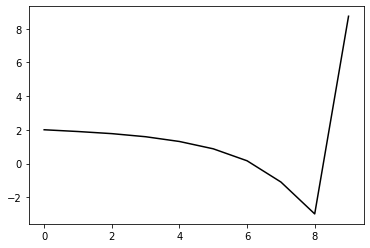

59000 0.12918066389427443
0.8184494599037002 -1.133232592152741 0.12493798839310818 0.057640674729085455
[ 1.94449195  1.90077564  1.80938182  1.66455431  1.41897809  1.0094005
  0.30635637 -0.94625086 -2.80265854  8.73598802]


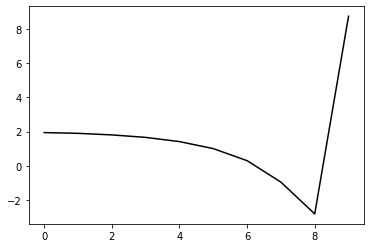

60000 0.16842822771662405
0.7903437375000661 -1.128377255600408 0.12570623606977704 0.05841055245593161
[ 1.94626951  1.85436431  1.7221698   1.55011115  1.29471037  0.89384754
  0.2108056  -1.0175218  -2.81158602  8.75637164]


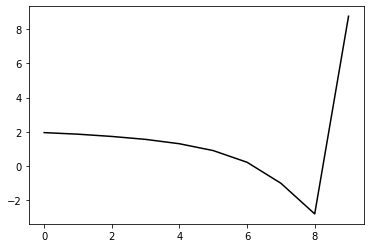

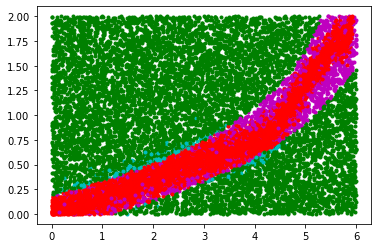

61000 0.3131622202950544
0.7671768428082858 -1.1219425827039122 0.127166133053382 0.05646804558468038
[ 1.92002327  1.87048226  1.76560255  1.62134638  1.39352507  1.01591826
  0.35458102 -0.85352272 -2.6184541   8.74826608]


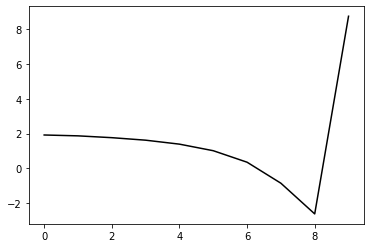

62000 0.18401638060893338
0.7513542750268621 -1.1097956505590405 0.12556784221967432 0.05832556384686736
[ 1.95253531  1.90220552  1.7854011   1.63094931  1.40859057  1.05412477
  0.43143022 -0.72921414 -2.43689717  8.7548758 ]


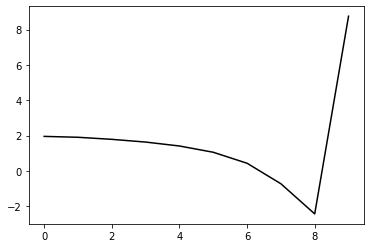

63000 0.19817751363990863
0.7403282252223875 -1.097856988588058 0.12565876525626954 0.05790152482026185
[ 1.91778968  1.8896723   1.79511049  1.62158828  1.35887679  0.96302795
  0.31717512 -0.8326106  -2.49947523  8.79711268]


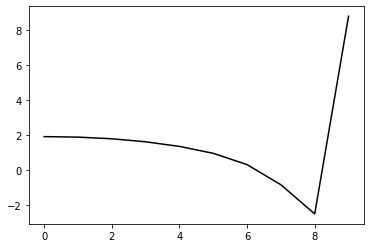

64000 0.24389490904368974
0.7257604285923964 -1.0853813371953769 0.12436171018943709 0.0589818291332951
[ 1.9369905   1.85538864  1.73971694  1.56318974  1.29099902  0.88337753
  0.23275599 -0.89472059 -2.48997206  8.77443684]


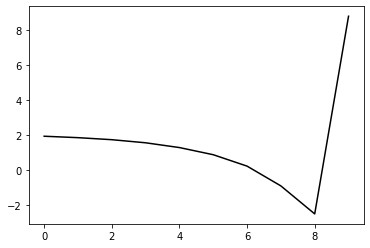

65000 0.1926805632247378
0.7195961251691204 -1.0717350990735486 0.12325112308910798 0.05682658557025424
[ 1.91129585  1.83678035  1.74116995  1.58404167  1.34523176  0.96876918
  0.33629152 -0.77533187 -2.31893367  8.82882729]


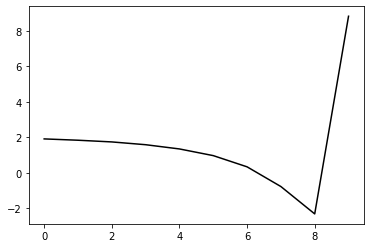

66000 0.12853324513199468
0.6900235270472681 -1.0744900484311282 0.12913466952585764 0.053212480649665266
[ 1.88244584  1.81702398  1.68062696  1.50026545  1.24570292  0.85815369
  0.21775092 -0.89872588 -2.42343401  8.78343777]


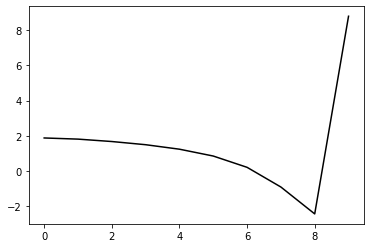

67000 0.2935113516149204
0.6878266699359191 -1.0472492448099797 0.11890834982446401 0.058459387075591285
[ 1.91731111  1.85113877  1.75996261  1.59499784  1.35024807  0.97924065
  0.363858   -0.72115858 -2.19886113  8.81849188]


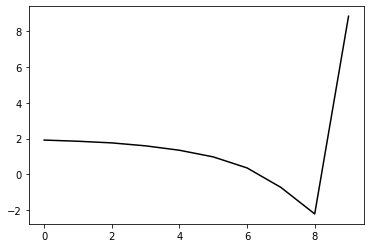

68000 0.25778519030207636
0.6729737456821837 -1.048911022356461 0.12699155412411997 0.06293686431931698
[ 1.82803259  1.86695534  1.79799856  1.64189409  1.38432449  0.97956987
  0.32793175 -0.77359653 -2.23578895  8.79641001]


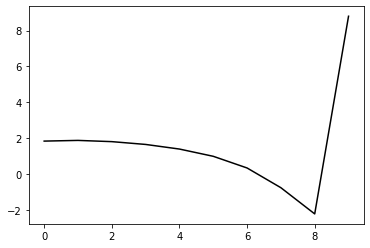

69000 0.26179651155054057
0.6606436657783201 -1.0373914833613724 0.12511529765226734 0.058115121477837074
[ 1.80105208  1.80464302  1.69845201  1.54534138  1.32304568  0.97209909
  0.36349573 -0.71732791 -2.14065579  8.79965108]


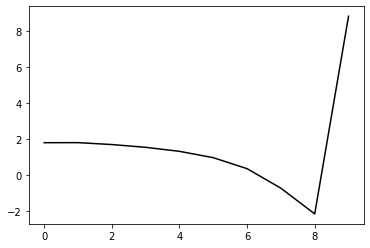

70000 0.32666133322759844
0.6510603583757124 -1.0286946855524322 0.12659875351256028 0.06142619076000114
[ 1.82972275  1.83120212  1.74164872  1.56781683  1.31511754  0.94402853
  0.35309045 -0.67991216 -2.03892736  8.80377702]


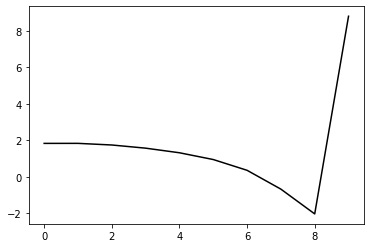

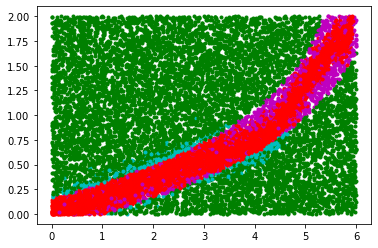

71000 0.21840062955345732
0.6265165902806535 -1.0130902659108025 0.1229058331339816 0.06071554522296128
[ 1.85861624  1.6987525   1.51579114  1.31492827  1.05423614  0.68233373
  0.09247904 -0.91557915 -2.21990017  8.80667828]


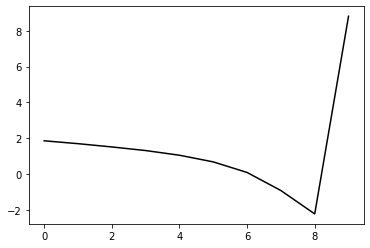

72000 0.22661959588209937
0.6375797001564468 -0.997562125131927 0.12358217740095448 0.061051571959410224
[ 1.80421915  1.81217524  1.72934347  1.56571426  1.3104507   0.92259657
  0.31067902 -0.70328923 -1.97665313  8.80661203]


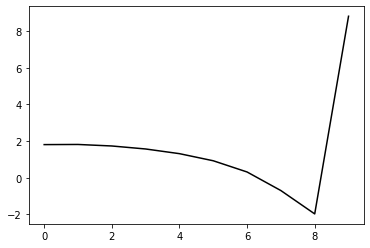

73000 0.20746593555949638
0.6162916783779188 -0.9912608601146957 0.125817280971867 0.059783075890453015
[ 1.83304961  1.74557891  1.60990004  1.43193269  1.18490619  0.82099933
  0.23084112 -0.77126668 -2.00797146  8.82589038]


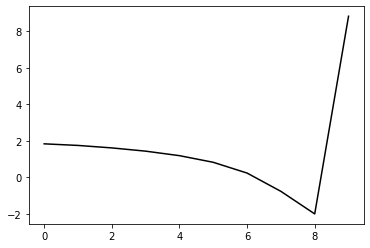

74000 0.19146778458478642
0.6031740108438398 -0.9826897035537313 0.12700674033845227 0.05798458566310247
[ 1.86598602  1.70421749  1.57743108  1.41662997  1.19288529  0.85266615
  0.29416387 -0.66465927 -1.83509129  8.89262322]


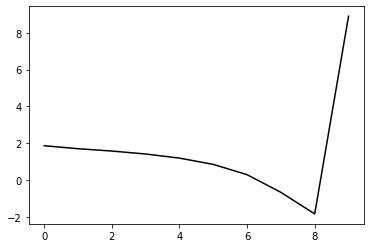

75000 0.23611183486214987
0.575833350659485 -0.9730538122533596 0.12709962650395573 0.05934484737844067
[ 1.83140537  1.51799695  1.33081836  1.12258018  0.84064321  0.44778924
 -0.15706413 -1.14497352 -2.31959709  8.806305  ]


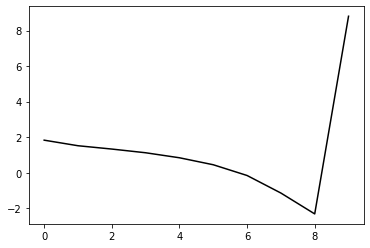

76000 0.25102143945600025
0.5992173967727453 -0.9529087723704613 0.1276788796550233 0.058858721280097594
[ 1.75229973  1.74262977  1.66141093  1.50500342  1.25354415  0.86747551
  0.25206337 -0.74887311 -1.92192771  8.85132965]


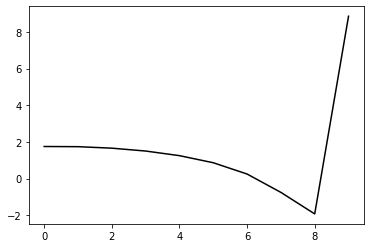

77000 0.3426482236319503
0.5853772296182735 -0.9436176069164832 0.12950288230767612 0.0560755761100327
[ 1.73817424  1.70815563  1.60633006  1.44643819  1.20242455  0.8246534
  0.20819629 -0.81383179 -2.00679427  8.82211238]


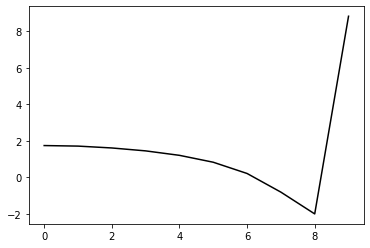

78000 0.3027193433194214
0.5692017983112565 -0.9364900597333351 0.13045621289937867 0.05454308159128574
[ 1.73413439  1.68452325  1.56439122  1.39875672  1.16581439  0.80986597
  0.22092581 -0.77844801 -1.9443872   8.82351039]


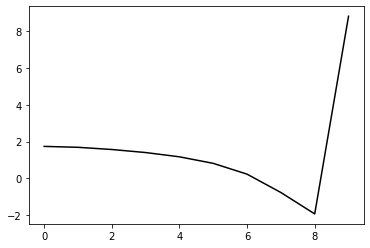

79000 0.2365961453332721
0.560237893626267 -0.9176998525264356 0.12585294606569233 0.06071649657310503
[ 1.79016673  1.67301837  1.58632376  1.45409122  1.24297463  0.90392874
  0.32890282 -0.65764257 -1.8118626   8.82023925]


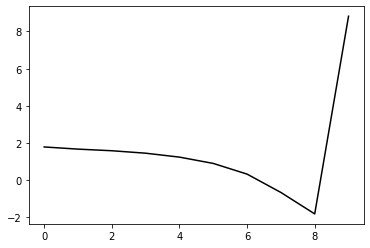

80000 0.4921399207479898
0.5518974878572027 -0.9016066484743541 0.12135426562034853 0.06449515268926492
[ 1.82030022  1.62950401  1.52878773  1.38841677  1.16589301  0.8130781
  0.23314538 -0.74935288 -1.8932598   8.84246587]


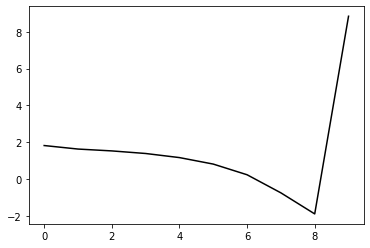

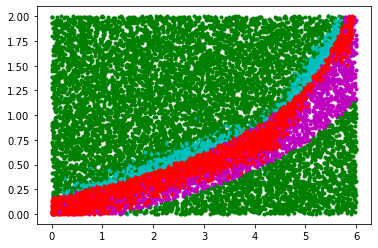

81000 0.18327544716156075
0.5511965508021844 -0.896401597771299 0.12736933630556505 0.05939212850605745
[ 1.7231649   1.72384474  1.63545972  1.47169868  1.2329758   0.87514888
  0.29290087 -0.68964783 -1.8296029   8.8342732 ]


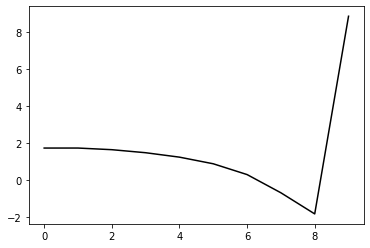

82000 0.207557219882751
0.5433853557335256 -0.8870516789644837 0.1287297207639658 0.06260067324760021
[ 1.73800025  1.73358301  1.65128153  1.5114645   1.28260308  0.9316595
  0.36104302 -0.60235086 -1.71361047  8.84363302]


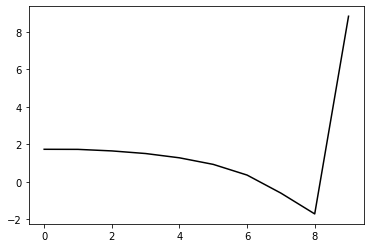

83000 0.17346153923431828
0.5280185590349278 -0.8762371797326126 0.12708164728926954 0.060362661549936414
[ 1.78940049  1.73325983  1.61739729  1.45462896  1.22938523  0.89525773
  0.35257322 -0.57313321 -1.64247138  8.86928977]


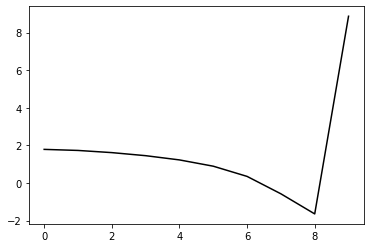

84000 0.17865081596708865
0.5265792015606238 -0.8649829299330647 0.1270009998001507 0.06053328954722842
[ 1.78873994  1.64343668  1.56078706  1.42710761  1.20163646  0.84503379
  0.28688122 -0.62027881 -1.64197257  8.85199472]


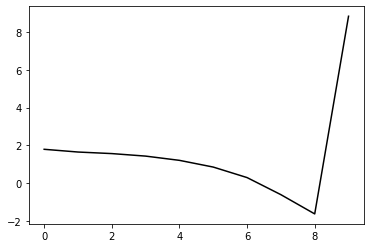

85000 0.300730155455238
0.5118925692614197 -0.8655876342389714 0.13280067385210836 0.05648783956004334
[ 1.72868647  1.65318681  1.53356499  1.37193483  1.1306494   0.76168998
  0.17699914 -0.76076282 -1.78656219  8.83884549]


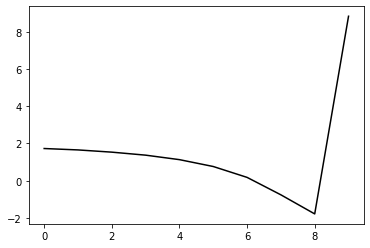

86000 0.19897973795699475
0.513894972815126 -0.8439068828342985 0.12703246781477373 0.06402450394889081
[ 1.74021916  1.74094564  1.66144812  1.49315315  1.23043381  0.84810924
  0.25958618 -0.68170786 -1.69577989  8.8471668 ]


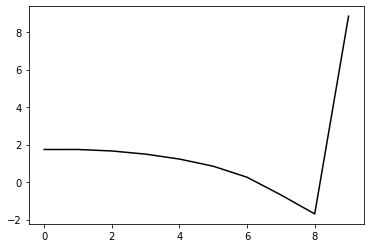

87000 0.20404120878676416
0.5092485879681019 -0.8333946841487119 0.1295436012999618 0.06471546462297757
[ 1.72960694  1.61191936  1.4762866   1.31604613  1.08622448  0.72524113
  0.14302644 -0.79482594 -1.79188225  8.83997097]


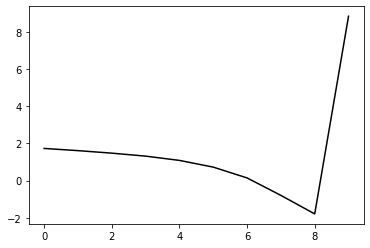

88000 0.13002301159220153
0.5091516572298812 -0.8243577604730477 0.13106667027123628 0.06423920928436623
[ 1.71802688  1.66771685  1.5656003   1.41920149  1.19826761  0.85589323
  0.30170208 -0.61224349 -1.57669209  8.88335795]


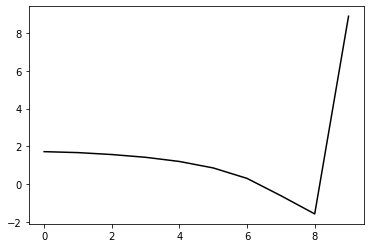

89000 0.2680402179418641
0.4965312490800769 -0.8135415020371382 0.12906269951110091 0.06437831728152078
[ 1.77392011  1.5671793   1.43564043  1.28065549  1.05589022  0.72795433
  0.21456633 -0.64126467 -1.54150326  8.87963594]


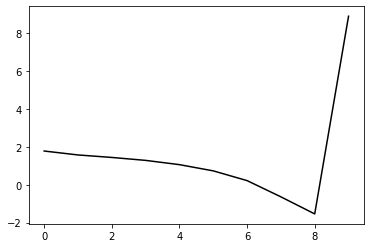

90000 0.15896790778129685
0.4956730768217512 -0.8061496331909128 0.13311434689672733 0.06275892120500567
[ 1.70081439  1.71930142  1.61574418  1.46166585  1.22250397  0.86212305
  0.31811719 -0.54000548 -1.42377866  8.9055666 ]


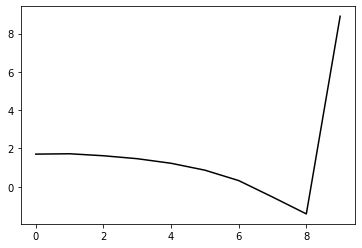

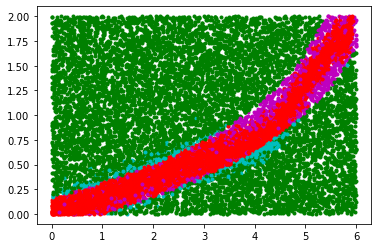

91000 0.14688732996604464
0.49043668204054175 -0.794828701404964 0.13352992178786627 0.0616970187344217
[ 1.71037193  1.69787774  1.60994387  1.4086402   1.11102594  0.71487328
  0.13573769 -0.7567099  -1.65992438  8.86696776]


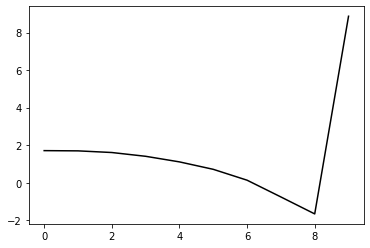

92000 0.2929797773099887
0.4859001257387988 -0.7870417584110686 0.13481375473492732 0.057757940833333896
[ 1.70047023  1.59954075  1.48486775  1.33958419  1.11443784  0.76189786
  0.19039965 -0.70879344 -1.5964993   8.8465549 ]


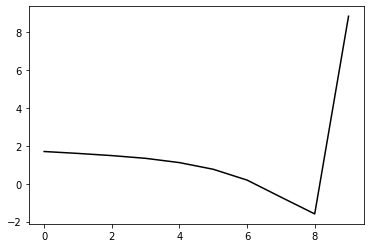

93000 0.2698429842749222
0.47828839590882727 -0.7738450145006233 0.1336893804274367 0.05831113751642798
[ 1.71372032  1.61673549  1.49481299  1.33372682  1.10582872  0.76377751
  0.2172941  -0.66256798 -1.52657793  8.84886322]


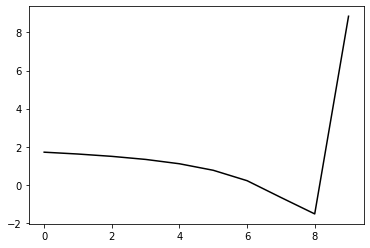

94000 0.18664553461447256
0.47037106560608216 -0.7677153535913149 0.13497674976469365 0.059457138724055246
[ 1.71291177  1.62632172  1.51071545  1.34190051  1.10444374  0.75270453
  0.20317651 -0.66972937 -1.51961496  8.88516448]


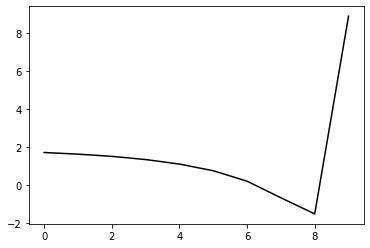

95000 0.17661355649614116
0.4589308089903557 -0.7577755307721559 0.1360929634301732 0.06157214945403672
[ 1.72181058  1.54050544  1.37550453  1.18024815  0.92769894  0.58405756
  0.05033825 -0.80691706 -1.64359552  8.85325503]


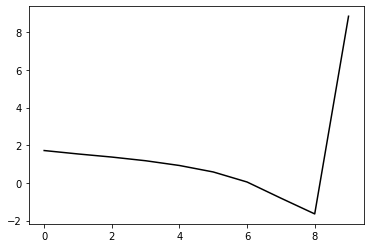

96000 0.2202515697493922
0.4609213056547862 -0.7368023405240753 0.13036843837010104 0.06077264163351246
[ 1.75617528  1.63784556  1.53643574  1.38348404  1.15340538  0.81066597
  0.27076291 -0.58852114 -1.42679645  8.87709178]


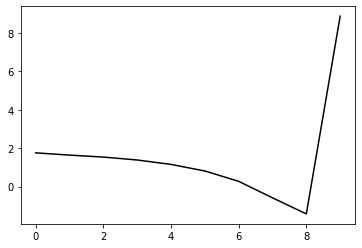

97000 0.26817786014142764
0.443800288401418 -0.7422699835855615 0.13917800353931994 0.05400336987079164
[ 1.70416545  1.56948252  1.39579871  1.2343632   1.01910174  0.69020076
  0.16398839 -0.68141427 -1.49933084  8.87890275]


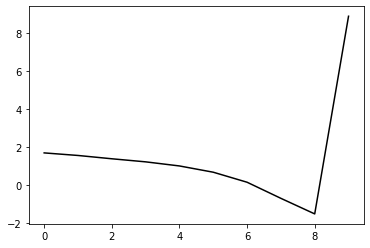

98000 0.18614820781167388
0.44536361563871146 -0.7246576863371619 0.13466494940618595 0.06308387808259858
[ 1.70347534  1.63984272  1.52065244  1.35761515  1.09857162  0.71706317
  0.15000579 -0.71751724 -1.53780164  8.86297621]


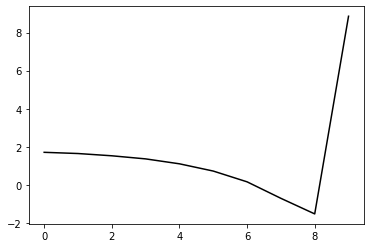

99000 0.15650263200554843
0.44120751298074434 -0.7155212472284407 0.13432176872715235 0.0632525945335269
[ 1.69342244  1.64457521  1.54234599  1.40603422  1.2008407   0.871908
  0.32553017 -0.54495468 -1.35696912  8.91233392]


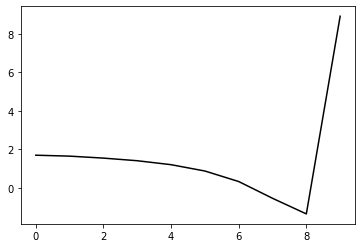

In [74]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print((j)*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

0 0.27806630305643215
0.4473978919497157 -0.7191680639754451 0.14527273047095632 0.07023879175044008
[ 1.66443525  1.56032342  1.43376827  1.27500398  1.05254788  0.72148431
  0.19939607 -0.64042543 -1.4184678   8.85677677]


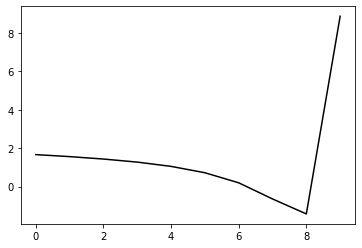

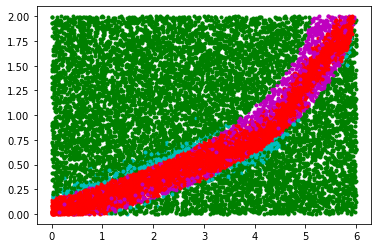

1000 0.42127285407136794
0.4687802445195064 -0.673263747589032 0.13317578120420623 0.07401496414400613
[ 1.63105397  1.56007464  1.45719769  1.27999536  1.02474479  0.65699937
  0.10999794 -0.73709819 -1.51759309  8.86098229]


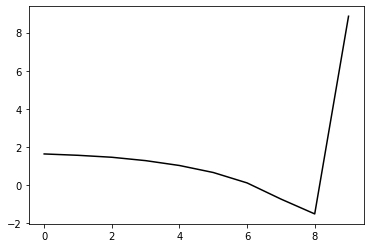

2000 0.20770146678558504
0.44439447631047885 -0.6798675072031399 0.14348529304650443 0.06790347895532195
[ 1.60725448  1.47295868  1.31189152  1.13961915  0.91693543  0.58718045
  0.06797285 -0.75301275 -1.49768429  8.89948384]


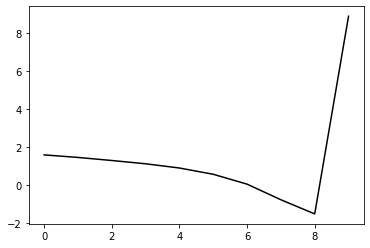

3000 0.21695232323521715
0.4444106321325786 -0.6592071741875563 0.13921351239834537 0.07116670428908833
[ 1.57896305  1.54996073  1.44168347  1.25301933  0.9880108   0.62128257
  0.07782563 -0.75964918 -1.52135383  8.87692439]


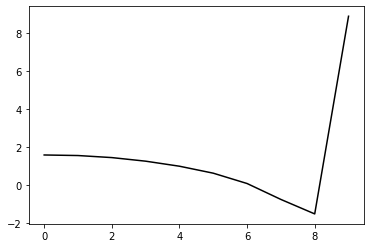

4000 0.40180769177686
0.43005973302884437 -0.6480128441845434 0.1361665419141548 0.07056787552768352
[ 1.66533276  1.49166585  1.38953157  1.24039694  1.0017857   0.65106438
  0.12285704 -0.69526287 -1.42667542  8.85773619]


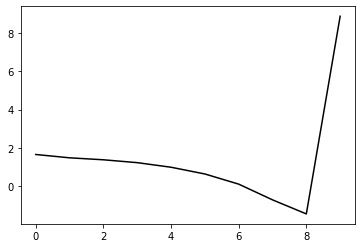

5000 0.24245899217793443
0.42756825212120214 -0.6431956661905992 0.1401538879926805 0.07079249889323004
[ 1.62139547  1.4889059   1.38349419  1.2275788   0.97986071  0.61184537
  0.06146763 -0.76577246 -1.48594398  8.86400458]


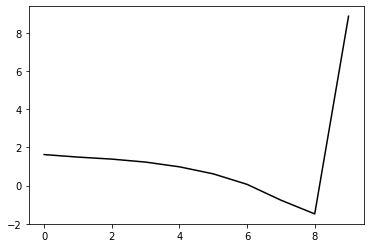

6000 0.26125515860361476
0.41441150574994906 -0.6422670188651673 0.1460724567706253 0.06286052423683353
[ 1.58197678  1.49459612  1.35416236  1.1661502   0.9195576   0.5840671
  0.06287976 -0.75607354 -1.46686873  8.89140472]


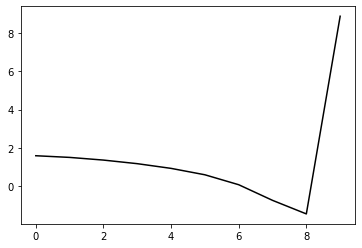

7000 0.22903258747226543
0.4099563555150285 -0.6221128425764609 0.14173370825434975 0.06761898178833123
[ 1.61826079  1.53403354  1.42341657  1.27143399  1.03622754  0.69315853
  0.17889395 -0.62157028 -1.31883282  8.88122781]


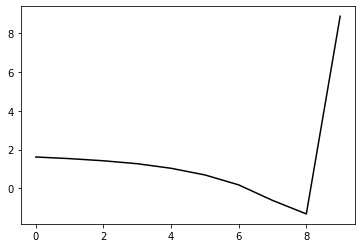

8000 0.20620696391124405
0.4024161286059564 -0.6190652122064 0.14415544934534547 0.0669981685163557
[ 1.61329374  1.58173058  1.48911916  1.32526637  1.07963296  0.73560084
  0.22692127 -0.55429964 -1.22090424  8.91459716]


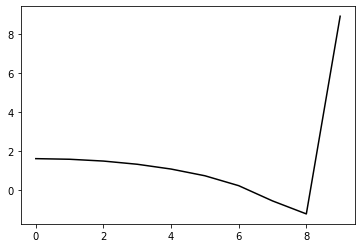

9000 0.22496554839198654
0.3915492234044086 -0.607790088036576 0.14138545135980063 0.06748880539130303
[ 1.61048416  1.54245509  1.43799046  1.28955076  1.06455217  0.73200457
  0.22325745 -0.55444782 -1.20944214  8.88545627]


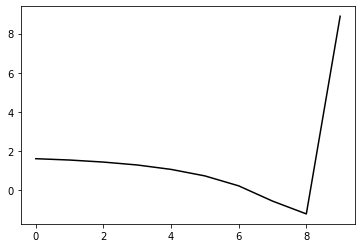

10000 0.2461018498200554
0.37920031936375653 -0.6052199692828047 0.1448876223660846 0.06399828625506077
[ 1.59868115  1.50349872  1.36288171  1.17621335  0.93732125  0.61887141
  0.1409194  -0.60489507 -1.22068301  8.92076632]


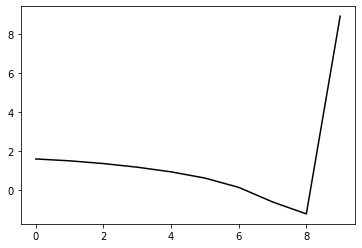

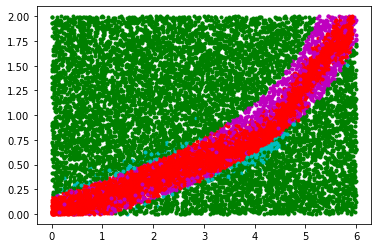

11000 0.22922638019554548
0.37182264260084474 -0.5879370594033152 0.1393356866844925 0.06959045600563359
[ 1.64686878  1.47592944  1.3784304   1.23835395  1.01435045  0.68259761
  0.18125495 -0.57572841 -1.19844113  8.93832887]


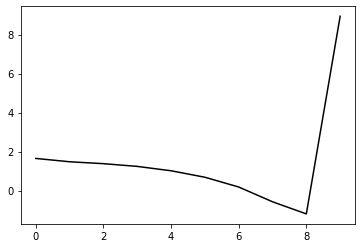

12000 0.2215447177036018
0.36709159085547227 -0.5905990830734587 0.14855210727950993 0.06738233542464658
[ 1.6033317   1.51560987  1.36720603  1.19409953  0.96173818  0.628873
  0.13173923 -0.61729838 -1.21625628  8.91373471]


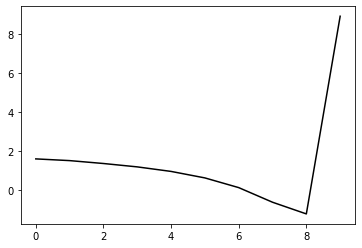

13000 0.16271697536059077
0.36819944501767704 -0.5788884807382689 0.14666710472158184 0.06717096391633065
[ 1.59181066  1.55929351  1.47087801  1.32471206  1.08870758  0.74098837
  0.2252335  -0.53901597 -1.13696277  8.91542516]


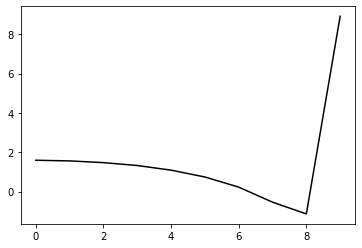

14000 0.3059902116713546
0.36256723955251086 -0.5641744974983107 0.1422278980954764 0.06807150393838067
[ 1.6257748   1.48341789  1.28610333  1.10037365  0.87690529  0.55125665
  0.04436295 -0.72406765 -1.31814275  8.90334011]


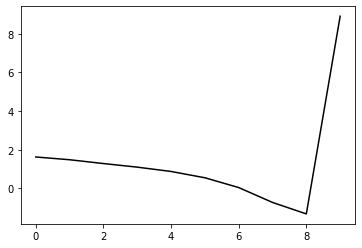

15000 0.19759242563454024
0.3612581997153395 -0.563350461370372 0.14847668435547434 0.06511706234846437
[ 1.56778309  1.48604837  1.38060121  1.22886738  0.99208283  0.64018038
  0.11546218 -0.66352296 -1.2624009   8.89876209]


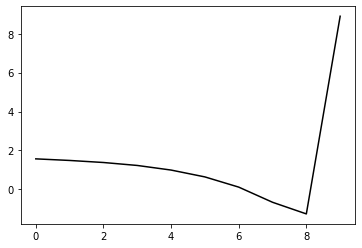

16000 0.21290643577376514
0.35009623452034183 -0.5593591886548622 0.15097176674958834 0.06393177552908111
[ 1.57647156  1.42442588  1.29989304  1.16117275  0.94736775  0.62651242
  0.12982372 -0.63489408 -1.22507624  8.89901117]


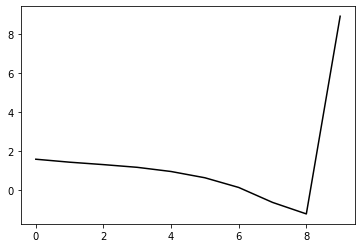

17000 0.16455343161949343
0.34880490903420164 -0.5456775379953476 0.1480047202949478 0.06696278720156407
[ 1.59244079  1.51058093  1.40913623  1.23518966  0.99134927  0.66395444
  0.17203479 -0.58296798 -1.16743158  8.91588764]


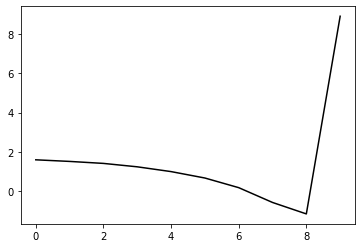

18000 0.21288633835271817
0.3428670135770091 -0.5336240539113084 0.14557714590613163 0.06971039810966022
[ 1.57912139  1.55522001  1.45929819  1.30242671  1.07717065  0.75579682
  0.26643361 -0.48037396 -1.05782375  8.92052085]


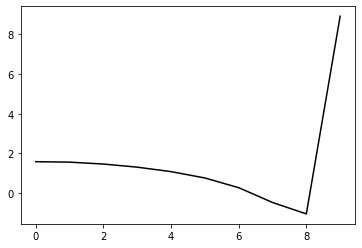

19000 0.1904025914795711
0.3437932424894834 -0.5272032905320937 0.14843542636673862 0.07014056921235341
[ 1.54396476  1.53233365  1.43116602  1.24896162  0.99567196  0.65760032
  0.16678492 -0.56947722 -1.12653136  8.92691171]


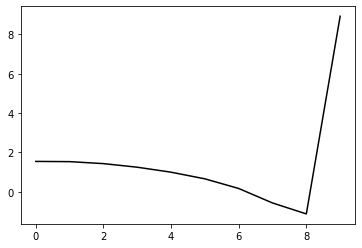

20000 0.3142138333764714
0.33436337081549533 -0.5176695057831222 0.14523625442057359 0.07052124972797254
[ 1.563387    1.49849742  1.38500318  1.21950086  0.99282167  0.67173061
  0.18596465 -0.54375826 -1.08299945  8.8855106 ]


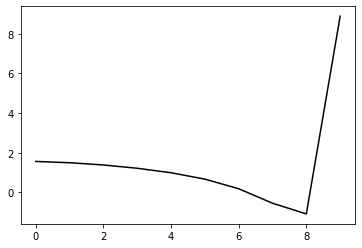

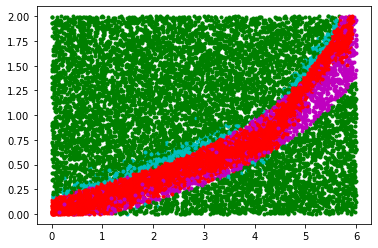

21000 0.23561993072424917
0.3312408681420083 -0.5176219796691439 0.15373520971487437 0.06540866659592584
[ 1.53778316  1.41430357  1.25718901  1.08725666  0.8551996   0.52967595
  0.040092   -0.69432697 -1.23604595  8.90431013]


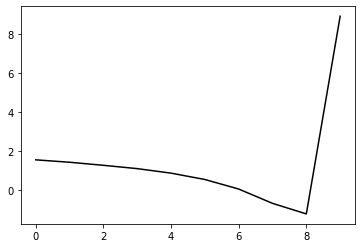

22000 0.22247674502158515
0.3332585405835974 -0.5016781953929137 0.15037511963533812 0.06830139390240614
[ 1.565745    1.47847714  1.37719654  1.22539524  0.99586402  0.66287437
  0.16694441 -0.56837938 -1.10523833  8.91446702]


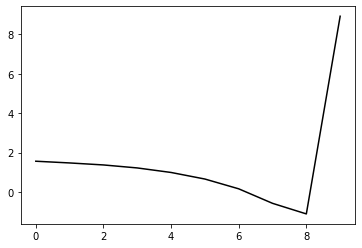

23000 0.18351822936016024
0.3352512327749751 -0.49745638768321876 0.15184433539148953 0.07050166735815148
[ 1.53770604  1.46705887  1.37658078  1.22907717  0.978276    0.60777657
  0.07383352 -0.68346572 -1.2106816   8.90501659]


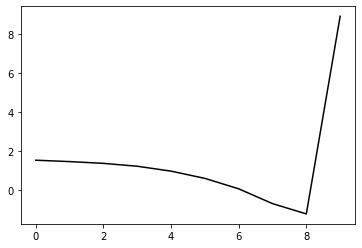

24000 0.20695466235766294
0.33223652171300194 -0.49116470669428697 0.15209471634301736 0.07115739434162008
[ 1.50640229  1.4596144   1.36603601  1.22054998  0.99144342  0.64240836
  0.10538329 -0.67733196 -1.21643633  8.90636886]


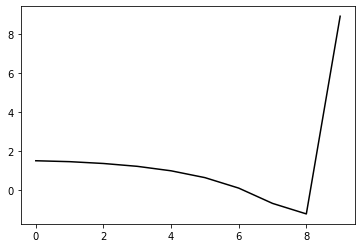

25000 0.18377505334763544
0.32075518008793796 -0.48660384982495736 0.15225242544748435 0.06912080396368761
[ 1.54918842  1.40910342  1.30062963  1.15257051  0.93879271  0.63570688
  0.16063457 -0.58335072 -1.1025989   8.92096956]


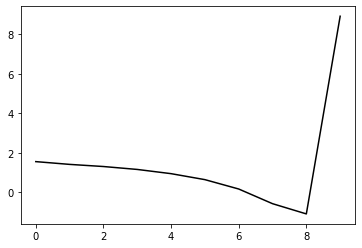

26000 0.191343641312485
0.3192931154488332 -0.48079165362026255 0.15550684525648995 0.06757590780920289
[ 1.53803512  1.43305719  1.29343933  1.11286917  0.88983637  0.57487503
  0.08972959 -0.64600525 -1.16409826  8.93017589]


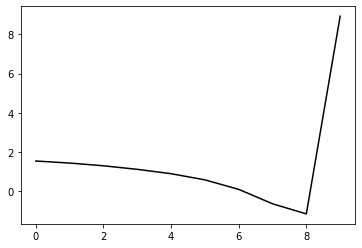

27000 0.15986915543069496
0.3024684031544554 -0.4809081092132873 0.15667789056423126 0.07014432326955401
[ 1.55532506  1.24287739  1.02020015  0.84055507  0.61570698  0.29385552
 -0.19156878 -0.90903758 -1.39600808  8.89707841]


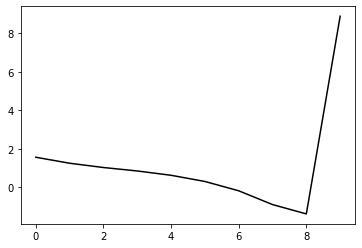

28000 0.25596752715932286
0.3118917188092492 -0.46574186370880116 0.15433100993597687 0.06999532284386205
[ 1.55956128  1.43431554  1.29723638  1.13751682  0.91928551  0.59916908
  0.11141248 -0.609874   -1.09459887  8.91983032]


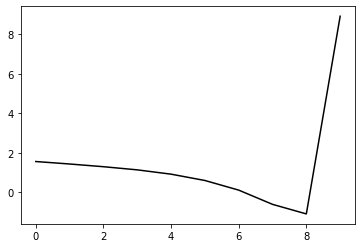

29000 0.26338644003513273
0.30890244745968415 -0.45948471958796844 0.15448909729817378 0.06931873246670277
[ 1.55391373  1.46827464  1.34144943  1.17981203  0.95305744  0.62070556
  0.12263434 -0.60614219 -1.09417846  8.90899984]


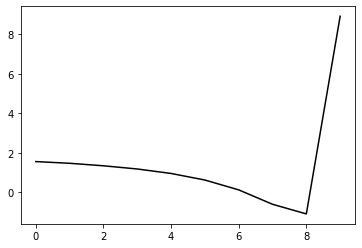

30000 0.2228793985162306
0.305496016750146 -0.45925648630674054 0.15783421963883115 0.0705570625008551
[ 1.5227412   1.5166147   1.41247373  1.25034985  1.02227371  0.68819623
  0.1916536  -0.52983775 -0.99472951  8.90140506]


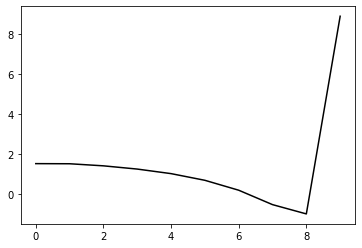

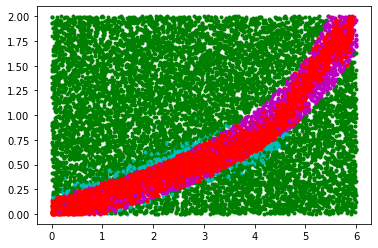

31000 0.2378124170032541
0.30224658272692934 -0.4521605941629934 0.15691645298362256 0.0734567681308196
[ 1.50863934  1.43127671  1.32563723  1.18612725  0.9695051   0.64013583
  0.1404996  -0.58546157 -1.04649438  8.98385206]


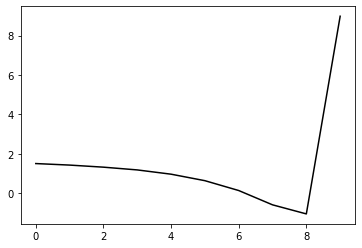

32000 0.15973970612185653
0.30083839278117624 -0.44275398642876906 0.15517157048917715 0.07560599308994331
[ 1.48707077  1.47795656  1.38161769  1.22731658  0.98878608  0.64320026
  0.12881167 -0.6203459  -1.10583662  8.91349429]


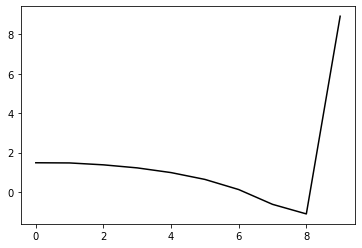

33000 0.201059424350704
0.30040669830354194 -0.4427009441173742 0.16085977272647323 0.07413829675909336
[ 1.47139083  1.42488553  1.33212542  1.20611412  0.99029415  0.65137703
  0.13447289 -0.61654916 -1.09863459  8.89596708]


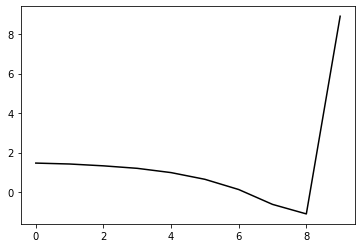

34000 0.21975846897048712
0.29290206764694854 -0.43726600632007145 0.16091110729018432 0.0719904656205612
[ 1.47473306  1.35771402  1.23665263  1.09223992  0.86896804  0.53887709
  0.03985075 -0.70430576 -1.18820172  8.89331358]


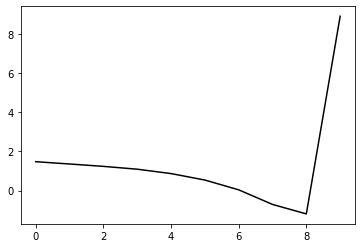

35000 0.21422448029689328
0.2906620484525212 -0.43088844783059166 0.1620322930894877 0.07044563420892591
[ 1.46625424e+00  1.36012969e+00  1.24552353e+00  1.08354883e+00
  8.41765046e-01  5.00513421e-01 -1.74696411e-03 -7.43665446e-01
 -1.23352783e+00  8.90684709e+00]


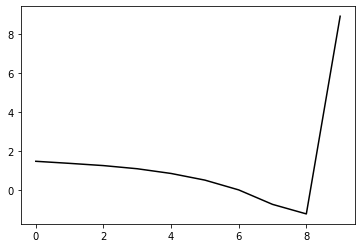

36000 0.26941489252998035
0.2929612349828914 -0.41395795419757586 0.15748104124066978 0.07441140721715782
[ 1.48368988  1.52619752  1.44457138  1.27616391  1.03007805  0.68937986
  0.19055661 -0.54284998 -1.02678639  8.93679572]


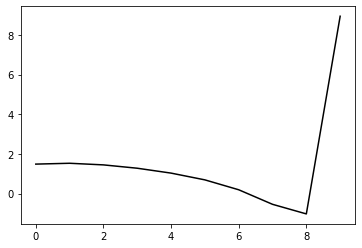

37000 0.18390169225898378
0.2907229084341704 -0.412321732299987 0.16100229900109894 0.07138352053419957
[ 1.45906338  1.43098106  1.32718667  1.16378788  0.92895235  0.58866926
  0.07813798 -0.66432027 -1.15027642  8.93240097]


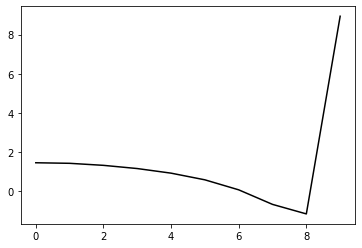

38000 0.2573580777413084
0.28382538948421765 -0.4096072770323824 0.16058774851583907 0.07713577843532994
[ 1.49113648  1.38371623  1.2247397   1.04994077  0.80059015  0.44455961
 -0.07419579 -0.82092467 -1.29944321  8.8883364 ]


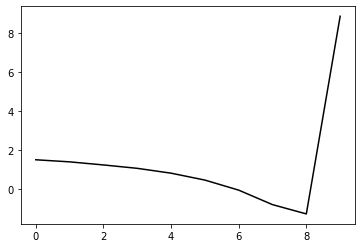

39000 0.16678758481062592
0.2827182351073333 -0.4024325502548687 0.16063497529639903 0.07608518835303289
[ 1.51741697  1.40204167  1.28506531  1.12455637  0.88779854  0.54689684
  0.03287469 -0.71621247 -1.19272067  8.9068251 ]


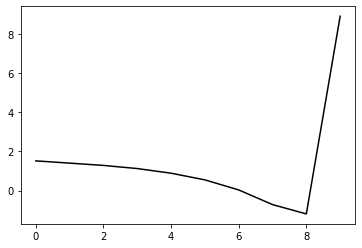

40000 0.1897134878756604
0.2835732268800755 -0.4035708008635136 0.16728874881473038 0.07368913704939091
[ 1.45208704  1.37509669  1.22203461  1.04586341  0.80575862  0.45951517
 -0.05259164 -0.79673269 -1.26411321  8.90363276]


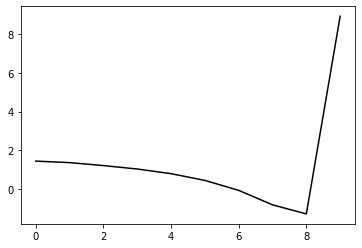

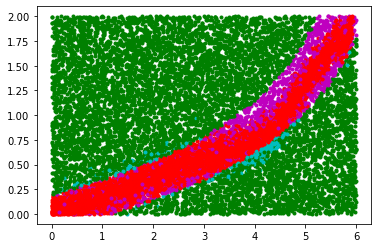

41000 0.18207037204068346
0.2811892818702907 -0.38657517424169924 0.1608457993479714 0.07866468431408825
[ 1.49201832  1.39652979  1.30675923  1.13517961  0.88929229  0.54949407
  0.04782213 -0.68908593 -1.15710592  8.91199   ]


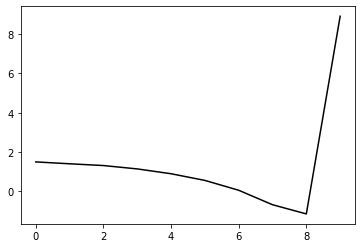

42000 0.2037318156228665
0.27683625654201327 -0.3931697577159924 0.1682530333327682 0.07331158826563648
[ 1.42582689  1.28865895  1.10970671  0.934052    0.70030065  0.3687535
 -0.13012057 -0.85901311 -1.30466129  8.89256994]


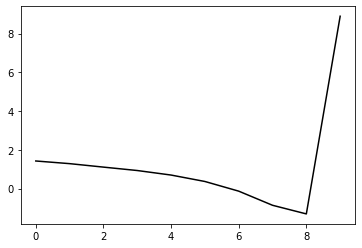

43000 0.14242791678442365
0.2835391397892134 -0.3831330925475192 0.16671634837901447 0.07817937366556389
[ 1.44136648  1.39336306  1.30277539  1.14033539  0.87940714  0.51032825
 -0.01440493 -0.7551552  -1.20382799  8.91146287]


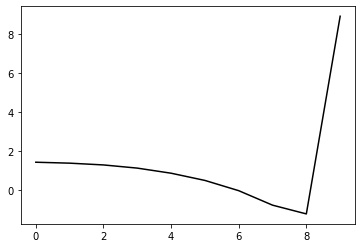

44000 0.20283443681760902
0.27907195959284403 -0.374930164817754 0.16636756596633856 0.07548719971704385
[ 1.47648966  1.37692163  1.25981515  1.07780829  0.82766638  0.4807062
 -0.03214638 -0.77573504 -1.22944549  8.91919811]


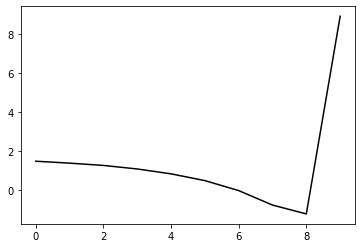

45000 0.20820788304181836
0.27551464621291455 -0.3706261141957285 0.16698546930009237 0.07801941499657535
[ 1.48191843  1.48614553  1.34958782  1.18535761  0.95620555  0.61282908
  0.09855132 -0.63979992 -1.08001508  8.91804707]


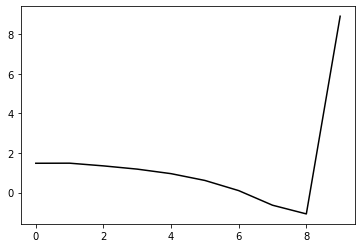

46000 0.1829342268592629
0.2709139409033003 -0.36766139086100597 0.168813931713376 0.07522237844422498
[ 1.48126559  1.4133687   1.31269122  1.14193168  0.89995838  0.56401923
  0.06671028 -0.66045621 -1.09358383  8.92883788]


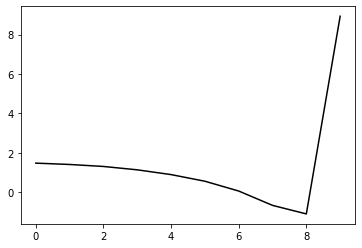

47000 0.21351422186667776
0.27259094624293373 -0.36164103736358105 0.16908415112879066 0.0780013106659606
[ 1.47875027  1.39292657  1.26835494  1.05604655  0.78979495  0.43267414
 -0.08155862 -0.81522328 -1.25072604  8.88024385]


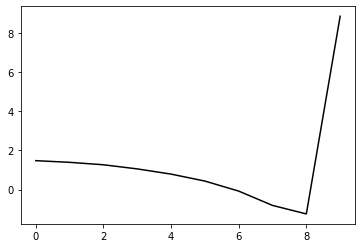

48000 0.2198116840692055
0.27556115421264255 -0.3614390875552899 0.17296572110030617 0.07965012393363384
[ 1.41692096e+00  1.41810232e+00  1.31918709e+00  1.15124167e+00
  9.02524748e-01  5.39423061e-01  5.86935226e-03 -7.40554882e-01
 -1.17466139e+00  8.90924218e+00]


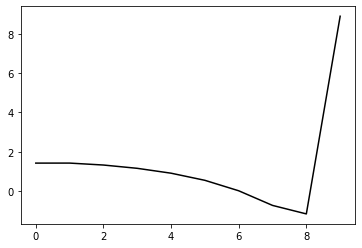

49000 0.22185148927862092
0.26387743328435254 -0.3531338641129832 0.16921086834270022 0.07926282402225591
[ 1.43847331  1.24926554  1.07657341  0.9096159   0.66865047  0.31401996
 -0.22128259 -0.99042348 -1.45175927  8.87292397]


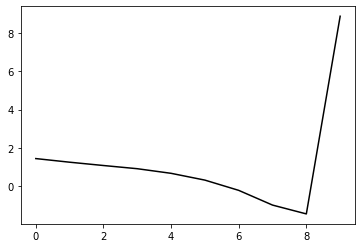

50000 0.17892745311292937
0.2622896472770674 -0.34992116630204745 0.17108978931628166 0.0787030906924244
[ 1.47426649e+00  1.32300812e+00  1.21226976e+00  1.07074515e+00
  8.42633408e-01  5.07504004e-01  6.26595190e-04 -7.47038392e-01
 -1.19561195e+00  8.91512383e+00]


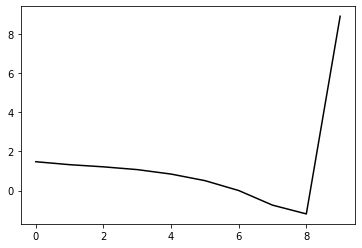

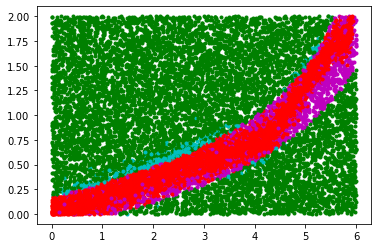

51000 0.12756886368952836
0.2664210330371553 -0.35061060460993576 0.1769884705306541 0.08058271088197848
[ 1.41466479  1.39048876  1.29993359  1.13975379  0.90168418  0.55895843
  0.04341749 -0.70792662 -1.16591023  8.91468494]


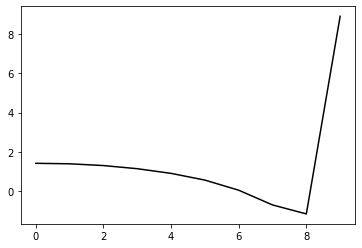

52000 0.20708054084096805
0.2658637871686154 -0.3412325880531372 0.17501307844783665 0.07661741291546209
[ 1.44992449  1.39062235  1.27699428  1.11581199  0.89413601  0.57043746
  0.06716289 -0.68409335 -1.15683147  8.93664945]


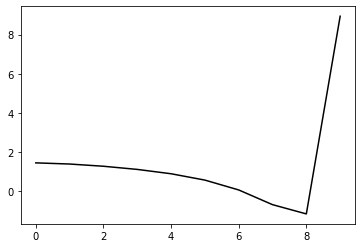

53000 0.2023788928946255
0.26305336574414906 -0.3404290525312701 0.17771014435262575 0.07395761631942291
[ 1.42698175  1.27502443  1.1335056   0.97439476  0.72423587  0.36428464
 -0.15269289 -0.90121874 -1.36988964  8.8614117 ]


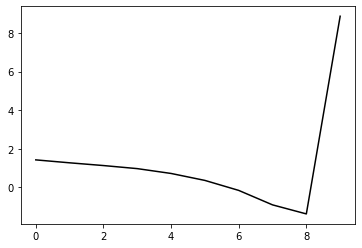

54000 0.18652054765649626
0.2646598552689388 -0.33723671522644477 0.1793031175258129 0.07822890382624205
[ 1.47824618  1.38955985  1.23964962  1.05559986  0.8001666   0.44213901
 -0.08079534 -0.82869593 -1.28703223  8.9292257 ]


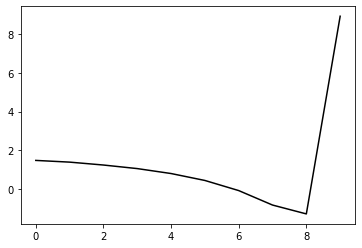

55000 0.1999182434549878
0.26364326673969735 -0.3306046429534863 0.17788929384847366 0.07951214704789389
[ 1.47341775e+00  1.39319709e+00  1.28986721e+00  1.14577644e+00
  9.05746058e-01  5.44176963e-01  5.30637755e-03 -7.59784229e-01
 -1.22648772e+00  8.88993844e+00]


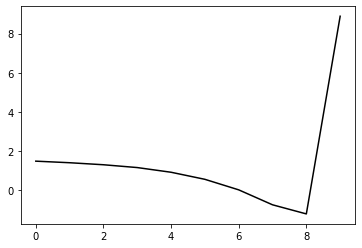

56000 0.23097697009678095
0.26460613704797614 -0.3242167571190002 0.17731129908936574 0.07774525210649211
[ 1.49212496  1.37661024  1.28386294  1.12317993  0.87415005  0.51027279
 -0.03547647 -0.81665329 -1.292836    8.92069845]


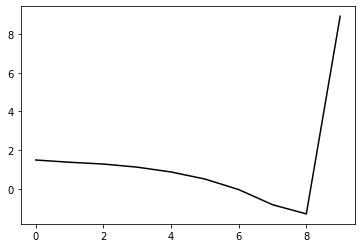

57000 0.18177369506828414
0.25841563711120336 -0.32651943703856257 0.18053019734900477 0.07881660534995974
[ 1.45650998  1.37701843  1.25654273  1.11175905  0.89269828  0.56029372
  0.04343644 -0.72191643 -1.18555663  8.92102223]


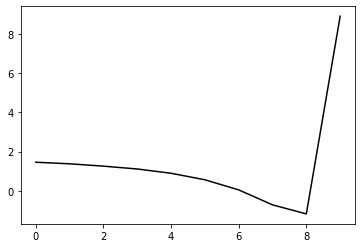

58000 0.23720968099417378
0.2545408766813172 -0.3201596971486235 0.18005487743634466 0.07504362217796508
[ 1.44874074  1.34909087  1.20134382  1.03495569  0.80040784  0.45995455
 -0.04869817 -0.80426339 -1.27635934  8.92672922]


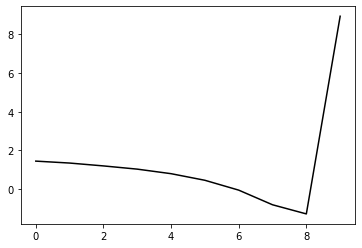

59000 0.13918400932250546
0.25537356433519937 -0.314921335208641 0.1790246905921348 0.07929246452048289
[ 1.46986652  1.38101999  1.28192378  1.1105153   0.84620775  0.48153727
 -0.03735175 -0.78229206 -1.23550849  8.91361262]


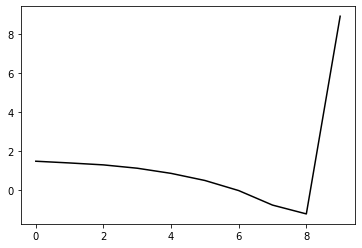

60000 0.14522765791795547
0.2554937161563152 -0.3124791214255106 0.18092739194126056 0.0800914027755077
[ 1.43131609  1.3810548   1.27971475  1.10859401  0.85408998  0.50075094
 -0.01975589 -0.76099643 -1.19455732  8.92355165]


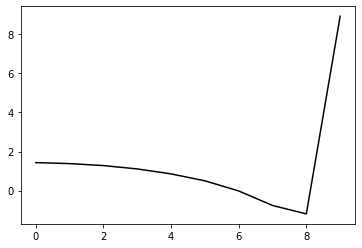

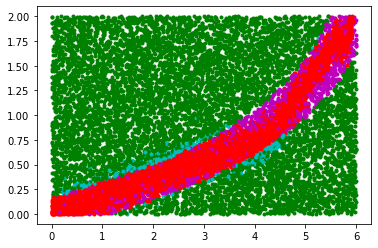

61000 0.2888435314990275
0.2543464874082876 -0.3066918228866374 0.1798535718788926 0.08311123170127992
[ 1.44175473  1.339527    1.26164647  1.10525127  0.84378717  0.47310245
 -0.06064497 -0.81697466 -1.25949841  8.91834251]


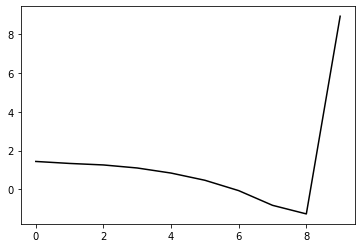

62000 0.17414689490682533
0.25203311990262783 -0.30501512482404436 0.18386113909595575 0.0803283890585301
[ 1.43082890e+00  1.37550741e+00  1.25614944e+00  1.09616918e+00
  8.62298217e-01  5.21212487e-01  2.79781207e-03 -7.48610577e-01
 -1.18765526e+00  8.89790820e+00]


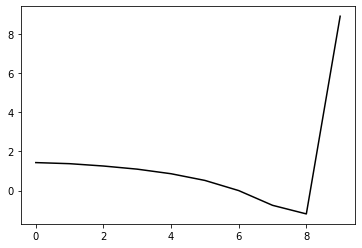

63000 0.18015517612989881
0.24721404573770633 -0.301174977501844 0.18180872980554752 0.08345732748974947
[ 1.44712764  1.31959353  1.13629081  0.94893285  0.69937602  0.345365
 -0.17567173 -0.92452022 -1.35825188  8.89863977]


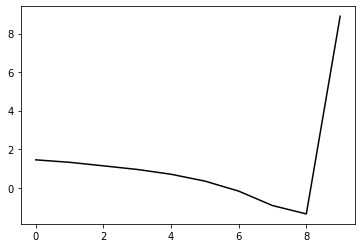

64000 0.28710615054931105
0.2480687413696429 -0.291453137838119 0.17893312656935564 0.08337448544074294
[ 1.47920972  1.3776618   1.27672044  1.1062275   0.8571007   0.50534986
 -0.01387796 -0.75902076 -1.18941791  8.86851887]


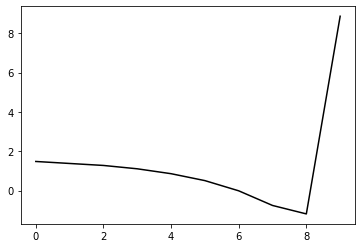

65000 0.1889033623112517
0.25261495370055 -0.29374087605787846 0.18547556239510277 0.08207274014770839
[ 1.43878282  1.31979605  1.20889279  1.03956235  0.78427946  0.42931227
 -0.08530466 -0.81776313 -1.22997491  8.88199859]


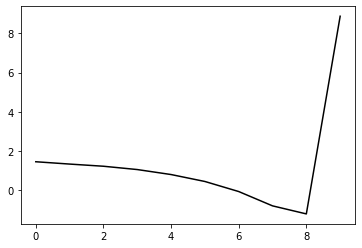

66000 0.10250850198894314
0.2519986175826878 -0.29093171522333094 0.18621912634159388 0.08333565845033045
[ 1.39508344  1.36685215  1.26027077  1.07880291  0.81804166  0.4556578
 -0.06539403 -0.79654863 -1.19757559  8.91509947]


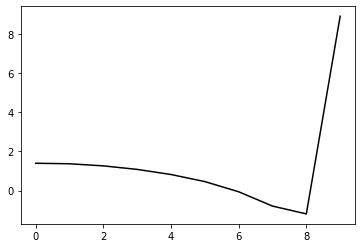

67000 0.24333145174551674
0.2440978396146833 -0.2879482455748913 0.18704124724837018 0.07891705126854202
[ 1.46482708  1.37650945  1.23806227  1.05494934  0.81274528  0.46968722
 -0.0458315  -0.782742   -1.19202795  8.90758815]


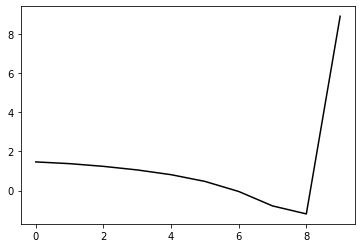

68000 0.2760440411133437
0.23880050821179288 -0.28214809897192017 0.18428005926029956 0.08267480886883892
[ 1.47211509e+00  1.37480033e+00  1.29199212e+00  1.13714274e+00
  8.90006444e-01  5.31113618e-01  4.18626028e-03 -7.41102156e-01
 -1.15693716e+00  8.90449922e+00]


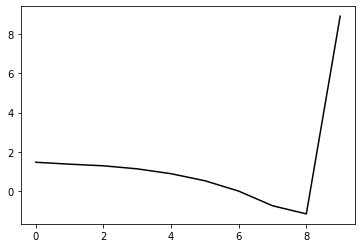

69000 0.2669859059908334
0.24192234114184272 -0.28551470662585504 0.18978354479907816 0.07893614911089757
[ 1.39095978  1.30982487  1.14387212  0.96357206  0.7148474   0.34928056
 -0.19479298 -0.96192087 -1.39572126  8.8942423 ]


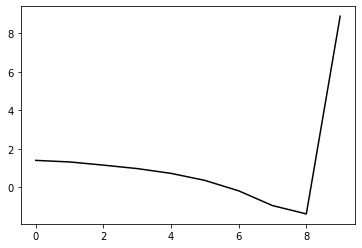

70000 0.3468632691180271
0.23623830104372637 -0.28311393141292684 0.18880042798115623 0.08141098301375134
[ 1.37075413  1.22401398  1.06911767  0.903534    0.64689111  0.27135641
 -0.28087178 -1.06226537 -1.51023724  8.86760763]


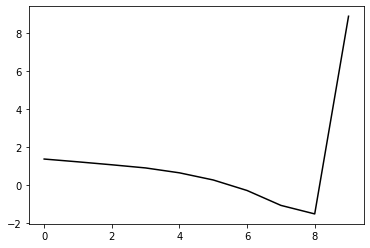

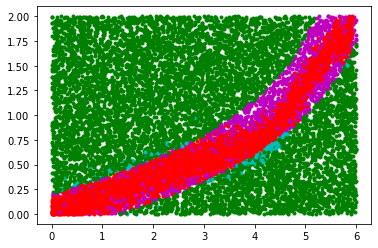

71000 0.14824428885418703
0.2459348138323772 -0.2761915502308161 0.18979423200218654 0.08622064208682115
[ 1.36641122  1.32671117  1.2317465   1.08263639  0.8340332   0.46536175
 -0.0834116  -0.86653355 -1.31032948  8.88610472]


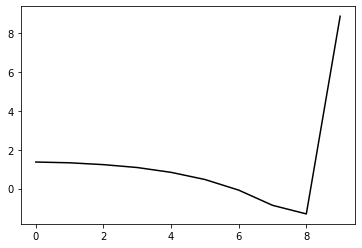

72000 0.20004883586332442
0.2403312341042122 -0.2718912172142661 0.18888152800500232 0.08298829000013454
[ 1.43312656  1.31242507  1.20618849  1.0539279   0.81659692  0.45892492
 -0.08232792 -0.86696603 -1.32538855  8.90565927]


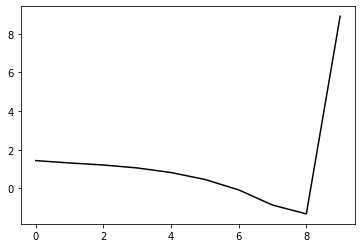

73000 0.2088100452826748
0.24244408920957608 -0.27153509145435 0.19112869579803776 0.08033041613331039
[ 1.3833809   1.26571888  1.06998543  0.87833099  0.62292184  0.24865482
 -0.30777257 -1.10774014 -1.58541594  8.86702324]


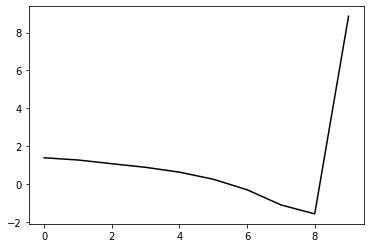

74000 0.18990535320954446
0.24102124787577126 -0.2698201408374507 0.19253371947282372 0.08535754583517108
[ 1.40523402  1.35733394  1.25485106  1.07683834  0.81370831  0.45070144
 -0.08998561 -0.87880949 -1.35782841  8.89812324]


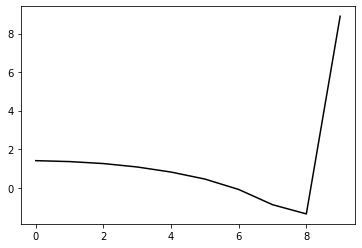

75000 0.2291285977808339
0.23571416560078773 -0.26913169272658305 0.19436392477023265 0.07819647096241532
[ 1.39926647  1.27776361  1.13517003  0.94647399  0.68624416  0.33042113
 -0.19811141 -0.97714253 -1.46021264  8.83394517]


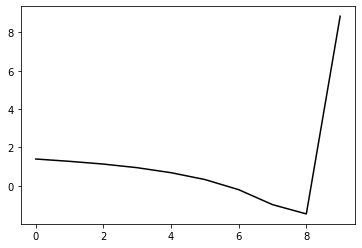

76000 0.25034125528630924
0.23864434941342016 -0.2663560190372598 0.1963292894976079 0.08099869010650233
[ 1.38881273  1.28688596  1.11333737  0.92033492  0.65624862  0.28303919
 -0.25759229 -1.03395868 -1.51405     8.88211229]


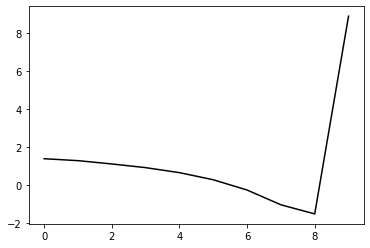

77000 0.21431751771350205
0.24035304125759216 -0.2629533731642036 0.1959387758143577 0.08597045462789489
[ 1.40402157  1.33182208  1.18284741  0.99932374  0.73509402  0.36016051
 -0.18614903 -0.96095051 -1.42883383  8.88138914]


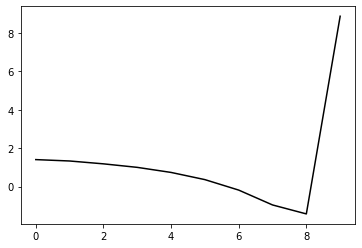

78000 0.14189207532905596
0.24025558433176772 -0.2600858223723601 0.19743928704216343 0.08316108697366553
[ 1.40127013  1.30331731  1.17194816  0.98229767  0.72652813  0.36210985
 -0.18269284 -0.96216391 -1.43137647  8.88111768]


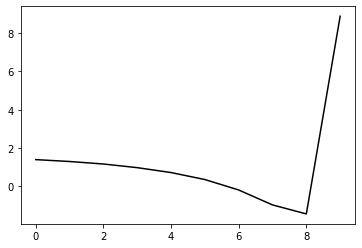

79000 0.30823863754650266
0.24124725197931143 -0.2506873862874172 0.1933801350726419 0.09041259521365548
[ 1.44481815  1.34391862  1.2578416   1.07091929  0.78979091  0.39792319
 -0.1760128  -0.99005303 -1.49502149  8.84196247]


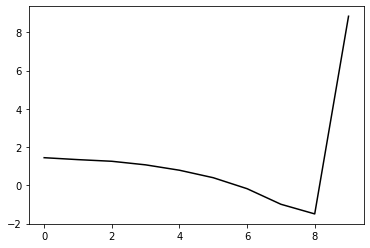

80000 0.3088519128122635
0.2391530891075107 -0.2546096728189823 0.1981991593838807 0.08685516583943045
[ 1.4459977   1.37200265  1.20847444  1.02700932  0.78191512  0.4205631
 -0.1372725  -0.95373907 -1.46296637  8.83320204]


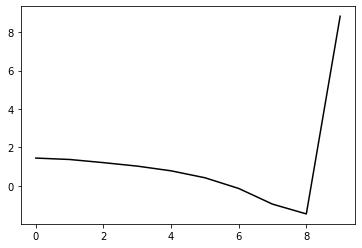

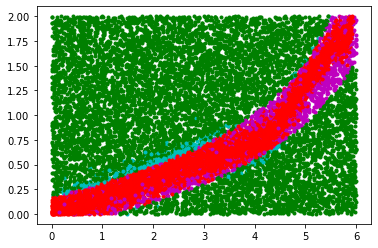

81000 0.4517980887740896
0.23249585523589625 -0.24410030107825556 0.19197969703949225 0.08968848949218412
[ 1.51340324  1.32875824  1.17379948  0.99055969  0.73539862  0.36352705
 -0.19493077 -1.01814576 -1.55741179  8.85593458]


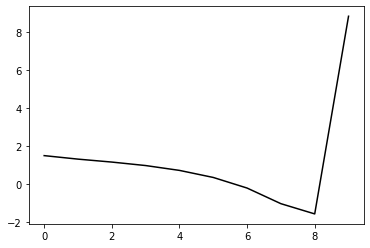

82000 0.19508111684699217
0.24024839102729575 -0.25539677007785067 0.20415916188084623 0.08457630700935037
[ 1.42934139  1.3335909   1.16818118  0.97596305  0.71837628  0.34671705
 -0.21215013 -1.02407966 -1.54535877  8.88484897]


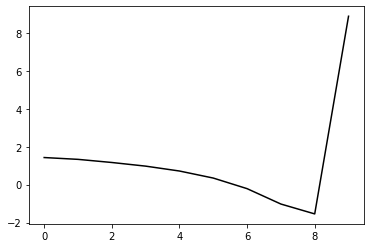

83000 0.19338758280697996
0.2414542585217238 -0.24333810750505117 0.19894255169399036 0.08711688670819281
[ 1.46796847  1.36423357  1.2626615   1.08955662  0.83284823  0.4631885
 -0.09237766 -0.89826254 -1.40911626  8.90822672]


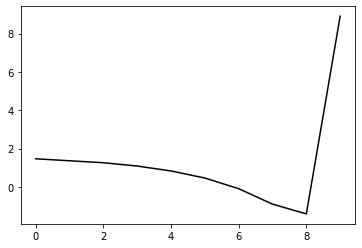

84000 0.30956509317750086
0.23456689749409576 -0.2356960694381704 0.19538288486858618 0.09081578365751698
[ 1.50548905  1.38417824  1.25220232  1.05244683  0.7695055   0.38501245
 -0.17820792 -0.99954907 -1.53936007  8.85103798]


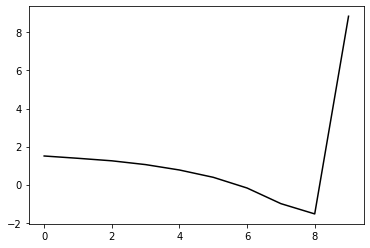

85000 0.2205793440282255
0.2406033069116187 -0.23761242684857092 0.20172825467157676 0.08638723949177582
[ 1.47852218  1.3300711   1.20903701  1.0541878   0.81669192  0.45954148
 -0.09206439 -0.90075557 -1.4256111   8.91192456]


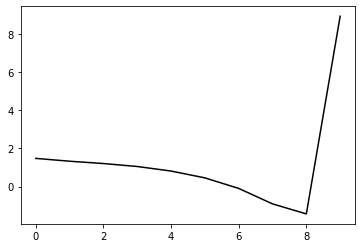

86000 0.21039824284380432
0.23768686824743088 -0.23196617064261585 0.19876540333315204 0.08922393007130362
[ 1.45370969  1.32671392  1.22837237  1.0620828   0.80222436  0.42109102
 -0.14777318 -0.9752336  -1.52477382  8.83743746]


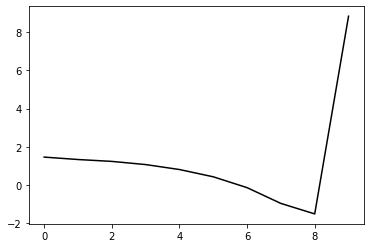

87000 0.18870989276884476
0.2373023644172327 -0.2341899624316389 0.20301481011322825 0.0868368213839277
[ 1.42123277  1.33613328  1.17723317  0.98195523  0.72254025  0.35280953
 -0.20355554 -1.02174538 -1.56113939  8.8742057 ]


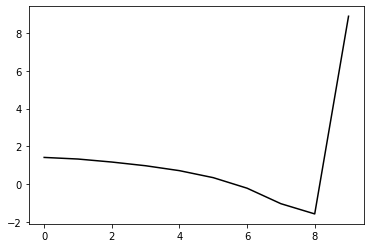

88000 0.16372820821073783
0.23419144758431365 -0.23731624604105023 0.20661216778165786 0.0842348510535978
[ 1.40476871  1.25254559  1.09723744  0.90777251  0.63428725  0.25367245
 -0.30511863 -1.11775444 -1.64953397  8.86587669]


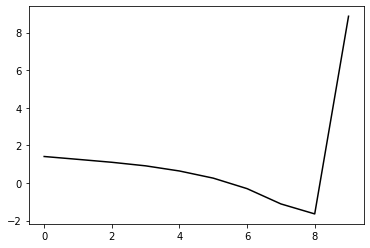

89000 0.2044877299973513
0.23972953748348802 -0.22697866746857295 0.2055303691917022 0.08649685086027745
[ 1.41353819  1.39063307  1.30139717  1.11799005  0.8447471   0.46113558
 -0.10517873 -0.923548   -1.46336755  8.89355188]


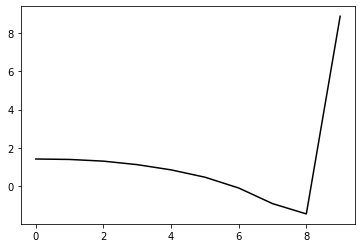

90000 0.14680599989816764
0.233183026790407 -0.22562142594247053 0.20588792742941742 0.08366397764118978
[ 1.43962172  1.34715986  1.24286046  1.07459815  0.8148795   0.44393872
 -0.11121444 -0.92435365 -1.46122391  8.90851292]


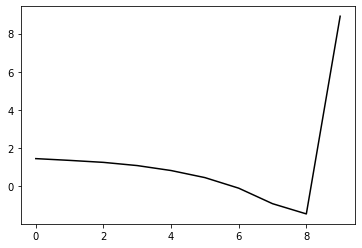

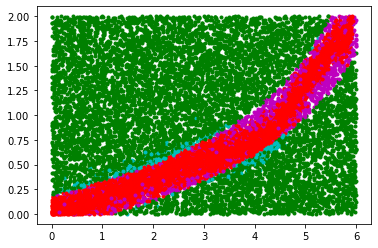

91000 0.13554214668447634
0.2347649766154433 -0.22536817671308088 0.2069826379015042 0.08597030008164637
[ 1.41824713  1.39777558  1.30776028  1.11593677  0.82067025  0.4165922
 -0.16444127 -0.99213097 -1.5290626   8.87038058]


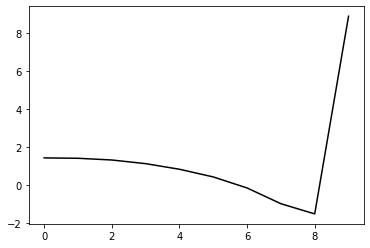

92000 0.30378568205935474
0.2299516520810675 -0.21979135992069534 0.20418691452907334 0.09052131411619835
[ 1.46360823  1.32291526  1.22305811  1.04291214  0.77079767  0.38426796
 -0.19191472 -1.01657824 -1.53984182  8.88517397]


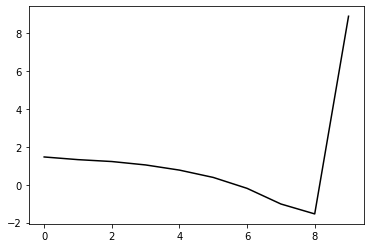

93000 0.2590612215882675
0.23712690800055966 -0.2207732129308423 0.20802267935174565 0.09104565888760129
[ 1.39641506  1.4215548   1.31000505  1.12039959  0.84541365  0.45494248
 -0.12814048 -0.96291817 -1.48957463  8.850897  ]


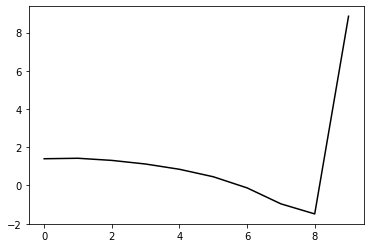

94000 0.15936450171937308
0.23325214006469122 -0.22201579611228775 0.20903143863450688 0.08924325355257398
[ 1.41797411  1.35655785  1.23002972  1.0582797   0.80649412  0.43406049
 -0.13460174 -0.95856469 -1.46766801  8.85615408]


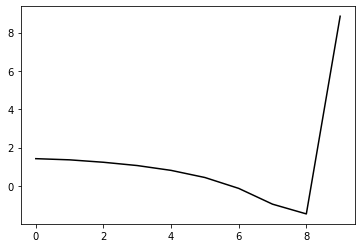

95000 0.18555306266518828
0.22895138481959068 -0.22536238081227208 0.212490793066841 0.08631202431843024
[ 1.44712171  1.35889298  1.18237577  0.98758404  0.72706382  0.35627586
 -0.19805159 -1.01463662 -1.53050608  8.88250007]


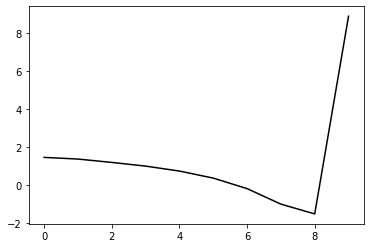

96000 0.2575204404234686
0.23238441507853005 -0.2225542584740417 0.21315329796993274 0.07967915565601137
[ 1.39336616  1.24790322  1.06728198  0.89135165  0.64141705  0.26543408
 -0.30259374 -1.12535681 -1.6504871   8.86408998]


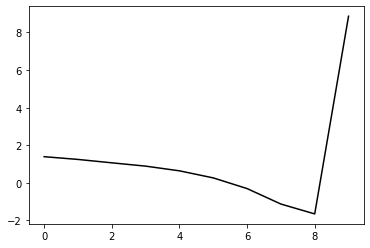

97000 0.13099375908750246
0.2320548778450088 -0.2171835480691089 0.21085148591698 0.08817300096786561
[ 1.42486258  1.37782061  1.26761352  1.09877088  0.83521547  0.45587544
 -0.10137426 -0.90966716 -1.4168197   8.88472243]


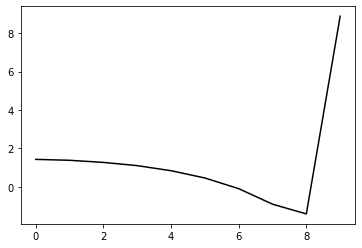

98000 0.17621407369487987
0.22855527605332845 -0.21788632808757166 0.21282908896354566 0.08675292887057576
[ 1.44484805  1.38995363  1.25308884  1.08039117  0.82573792  0.45062077
 -0.10650706 -0.91763119 -1.43537954  8.89210687]


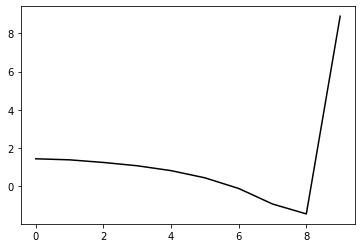

99000 0.33154166279225883
0.2289537133544111 -0.22042912990406177 0.2180762076576304 0.07743975134084204
[ 1.40288203  1.27198291  1.11891907  0.91257626  0.6364128   0.25834503
 -0.29762779 -1.10667777 -1.62801045  8.86053701]


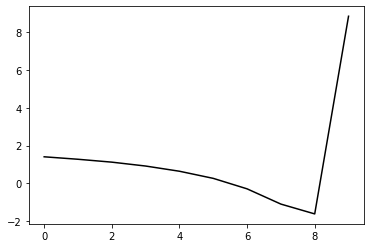

In [75]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

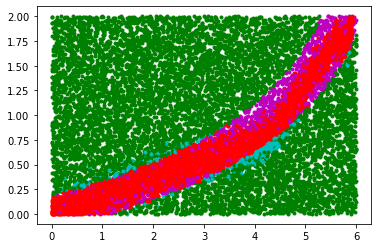

In [76]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

99990 0.15763018372324084
0.22583212831369406 -0.21548518341351755 0.21565787267983133 0.08457561818690448
[ 1.42613965  1.33522623  1.2034507   1.04140412  0.79928861  0.42852081
 -0.13303323 -0.93832094 -1.44441855  8.89420541]


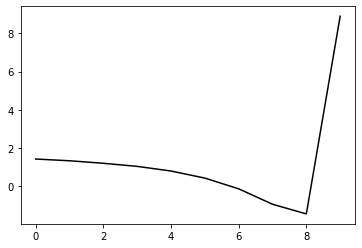

([<matplotlib.lines.Line2D at 0x19422b54a08>], None)

In [77]:
print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
plt.plot(h.numpy(), 'k-'), plt.show()